# Census Income Project

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

### Description of fnlwgt (final weight)

#### The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
#importing imp libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Analysis

In [2]:
pd.set_option("max_rows", None)
pd.set_option("max_columns", None)

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/arjun0200/Datasets/main/census_income.csv")
df.head()  # checking first rows of the dataset

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.tail(5)   # checking last rows of the dataset

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df.sample(5)  # checking random rows of the dataset

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
12047,22,Private,353039,HS-grad,9,Never-married,Craft-repair,Unmarried,White,Female,0,0,36,Mexico,<=50K
8278,36,Private,447346,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,>50K
30480,50,Self-emp-not-inc,371305,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,1902,60,United-States,>50K
18551,18,Private,210828,Some-college,10,Never-married,Handlers-cleaners,Own-child,Other,Male,0,0,30,United-States,<=50K
22551,21,Private,305446,Some-college,10,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [6]:
df.shape # checking size of the dataset

(32560, 15)

#### Checking some more dataset rows for better understandings

In [7]:
df.head(50)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


### Checking Target Variable

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


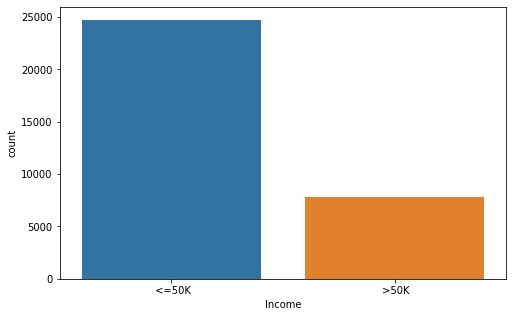

In [8]:
plt.figure(figsize = (8,5))
target = df.Income.value_counts()
print(target)
target = sns.countplot(df.Income)

#### Observations of the target variable
 <=50K are higher people rest >50K are only 7839 peoples

#### 

In [9]:
df.dtypes  # checking datatypes of the dataset

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object


#### From above information we find out that 'Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week' are the integet type variables rest 'Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income' are of objects types.

In [10]:
df.info()  # checking basic summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
df.describe(include = 'all')  # checking overall summary of the dataset

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560,3.256000e+04,32560,32560.000000,32560,32560,32560,32560,32560,32560.000000,32560.000000,32560.000000,32560,32560
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,24719
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,NaN
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


<AxesSubplot:>

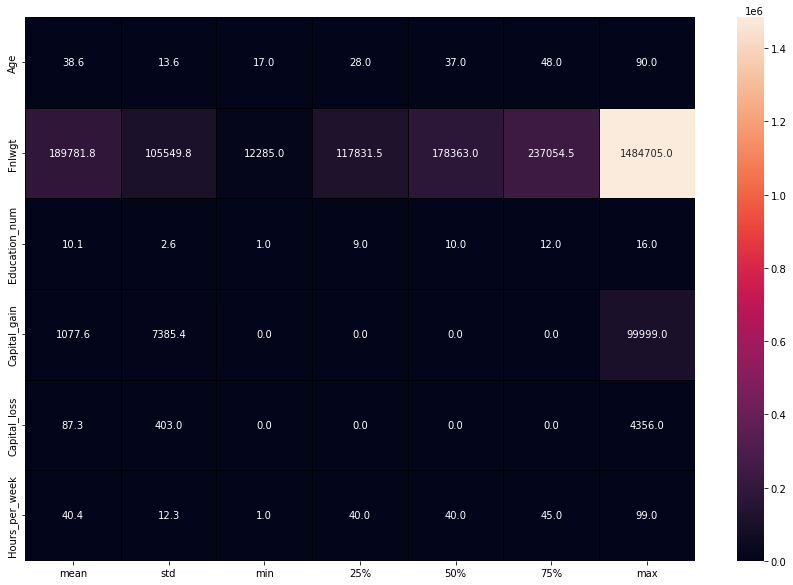

In [12]:
plt.figure(figsize = (15,10))
sns.heatmap(df.describe()[1:].transpose(), linewidths = 1, linecolor = 'black', annot = True, fmt = '.1f' )

#### From above information we find that max values of Fnlwgt, Capital gain and capital loss are much higher than its overall values. Due to these columns of dataset probably having outliers in the dataset.

## Checking Null Values of the Dataset

In [13]:
df.isnull().sum()/len(df)

Age               0.0
Workclass         0.0
Fnlwgt            0.0
Education         0.0
Education_num     0.0
Marital_status    0.0
Occupation        0.0
Relationship      0.0
Race              0.0
Sex               0.0
Capital_gain      0.0
Capital_loss      0.0
Hours_per_week    0.0
Native_country    0.0
Income            0.0
dtype: float64

<AxesSubplot:>

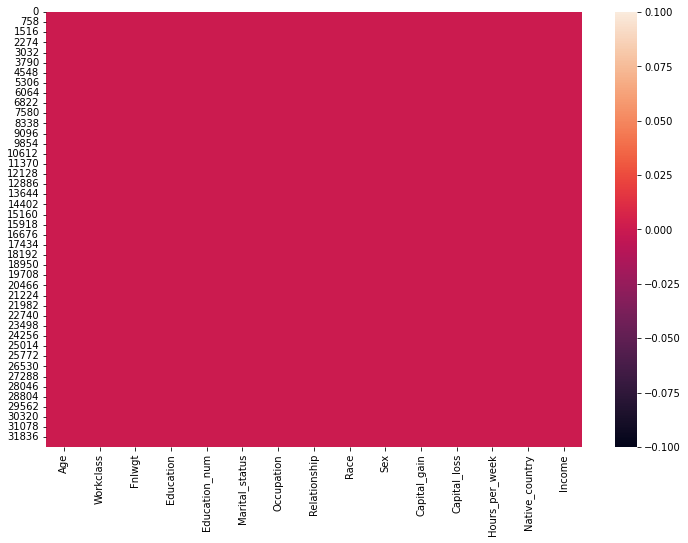

In [14]:
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull())

#### From above graph we find that there is no null value present in the dataset.

## Exploratory Data Analysis

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Checking Duplicates Values

#### Checking Duplicates counts

In [16]:
df.duplicated().sum()   # duplicate values counts of the dataset 

24

In [17]:
df[df.duplicated()] # checking duplicated rows

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
4880,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5103,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9170,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11630,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13083,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15058,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17039,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18554,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18697,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21317,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


## Dropping Duplicated Rows

In [18]:
df.drop_duplicates(inplace = True)   # dropping duplicate values for improved dataset 

In [19]:
df.shape  # checking duplicated dropped dataset i.e new shape

(32536, 15)

### Dividing columns into object and integer categories for easy visualization understandings

In [20]:
df_object = df.select_dtypes(include = 'object').columns  # object dataset columns
df_integer = df.select_dtypes(exclude = 'object').columns  # integer dataset columns

In [21]:
df_object  # checking object columns

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

In [22]:
df_integer  # checking non object columns

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')

### Checking unique values of the dataset

In [23]:
for i in df_object:
    print(i,'\n' ,df[i].unique().shape)  # checking unique values counts

Workclass 
 (9,)
Education 
 (16,)
Marital_status 
 (7,)
Occupation 
 (15,)
Relationship 
 (6,)
Race 
 (5,)
Sex 
 (2,)
Native_country 
 (42,)
Income 
 (2,)


In [24]:
for i in df_object:
    print(i,'\n' ,df[i].unique(), "\n")  # checking unique values

Workclass 
 [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

Education 
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

Marital_status 
 [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed'] 

Occupation 
 [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv'] 

Relationship 
 [' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 

Race 
 [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'] 

Sex 
 [' Male' ' Female'] 

Native_country 
 [' United-States

# Univariate Analysis with respect to Target Variable

## Categorical Values

In [25]:
df_object

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

### Workclass with respect to Income

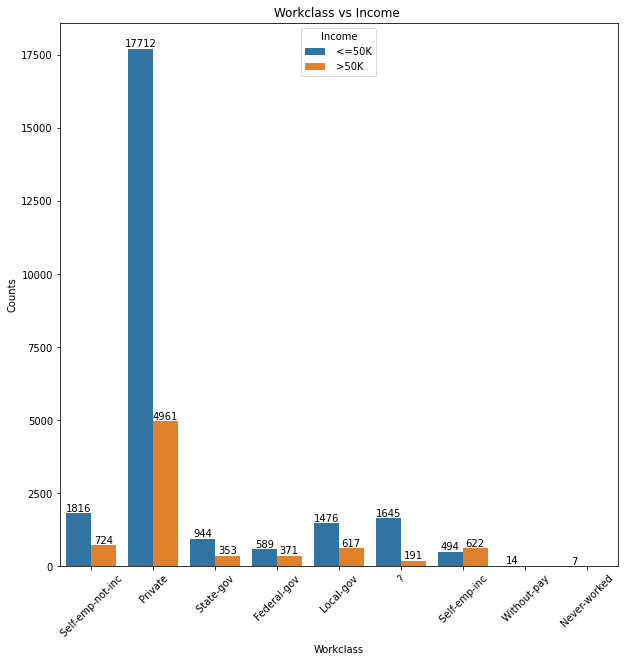

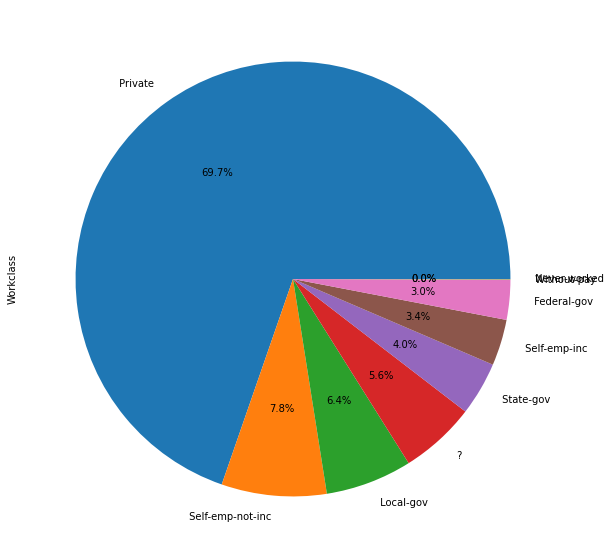

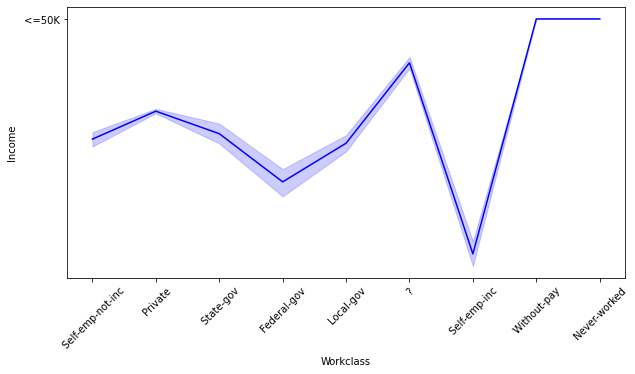

In [26]:
workclass = df.Workclass.value_counts()
plt.figure(figsize = (10,10))
df_workclass = sns.countplot(x='Workclass', hue='Income',data = df)
df_workclass.set_title('Workclass vs Income ')
df_workclass.set_xlabel('Workclass')
df_workclass.set_ylabel('Counts')
plt.xticks(rotation = 45)
for i in df_workclass.containers:
    df_workclass.bar_label(i)
    
# Percentage of workclass
plt.figure(figsize = (10,10))
workclass.plot(kind = 'pie', autopct = '%1.1f%%')


plt.figure(figsize=(10,5))
sns.lineplot(x="Workclass",y="Income",data=df, color='blue')
plt.xticks(rotation = 45)
plt.show()

### Observations:

#### Value counts of the Workclass

In [27]:
# workclass           Counts
# Private             22673
# Self-emp-not-inc     2540
# Local-gov            2093
# ?                    1836
# State-gov            1297
# Self-emp-inc         1116
# Federal-gov           960
# Without-pay            14
# Never-worked            7

#### Most of the people worked in the Private workclass and very less people are not worked.

#### 

#### Value counts of the Workclass with respect to income

In [28]:
# Workclass          Income    Counts
#  ?                  <=50K     1645
#                     >50K       191

#  Federal-gov        <=50K      589
#                     >50K       371

#  Local-gov          <=50K     1476
#                     >50K       617

#  Never-worked       <=50K        7

#  Private            <=50K    17712
#                     >50K      4961

#  Self-emp-inc       >50K       622
#                     <=50K      494

#  Self-emp-not-inc   <=50K     1816
#                     >50K       724

#  State-gov          <=50K      944
#                     >50K       353

#  Without-pay        <=50K       14


#### Private sector provide 4961 people greater then 50k salaries and rest of the workclass are very small in amount to pay greater than 50k salaries. Federal - gov pay very less people greater than 50k.


#### Pie Chart

69.7 Percentage of the people are worked in the private workclass.

3.0 Percentage of the people are worked in the federal gov and negligible amount of people worked without pay.

#### Line Chart

Self emp inc people are getting >50K income according to their overall ratio

#### 

## Education with respect to Income

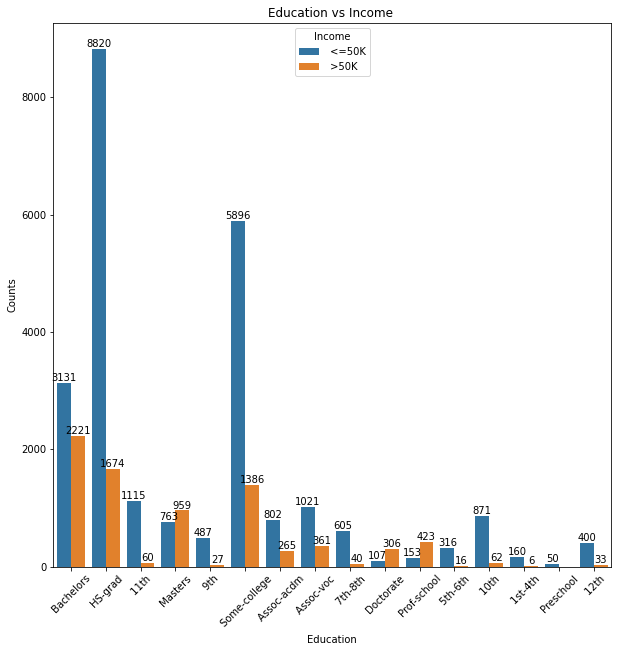

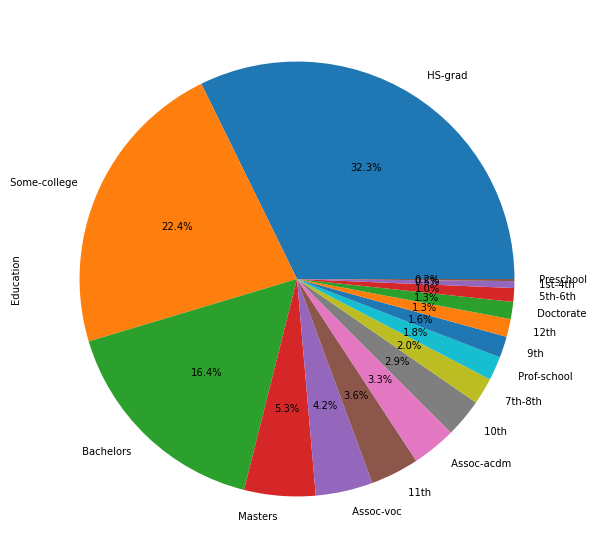

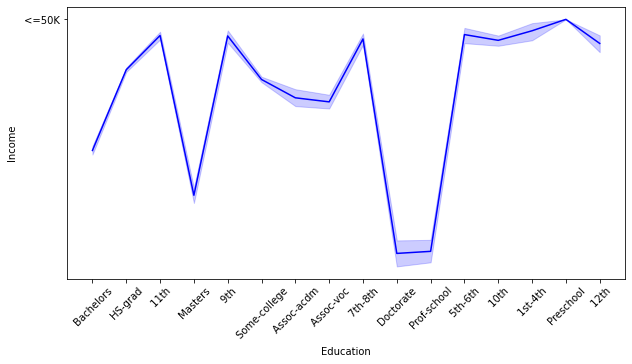

In [29]:
Education = df.Education.value_counts()
plt.figure(figsize = (10,10))
df_education = sns.countplot(x='Education', hue='Income',data = df)
df_education.set_title('Education vs Income ')
df_education.set_xlabel('Education')
df_education.set_ylabel('Counts')
plt.xticks(rotation = 45)
for i in df_education.containers:
    df_education.bar_label(i)
    
# Percentage of workclass
plt.figure(figsize = (10,10))
Education.plot(kind = 'pie', autopct = '%1.1f%%')


plt.figure(figsize=(10,5))
sns.lineplot(x="Education",y="Income",data=df, color='blue')
plt.xticks(rotation = 45)
plt.show()

## Observations:

Value counts of the Education

In [30]:
#  Education      Counts
#  HS-grad         10494
#  Some-college     7282
#  Bachelors        5352
#  Masters          1722
#  Assoc-voc        1382
#  11th             1175
#  Assoc-acdm       1067
#  10th              933
#  7th-8th           645
#  Prof-school       576
#  9th               514
#  12th              433
#  Doctorate         413
#  5th-6th           332
#  1st-4th           166
#  Preschool          50

#### Most of the people are high school graduate and very less people are of preschool are getting income.

#### 

#### Value counts of the Education with respect to Income

In [31]:
# Education      Income    Counts
#  10th           <=50K     871
#                 >50K       62
#  11th           <=50K    1115
#                 >50K       60
#  12th           <=50K     400
#                 >50K       33
#  1st-4th        <=50K     160
#                 >50K        6
#  5th-6th        <=50K     316
#                 >50K       16
#  7th-8th        <=50K     605
#                 >50K       40
#  9th            <=50K     487
#                 >50K       27
#  Assoc-acdm     <=50K     802
#                 >50K      265
#  Assoc-voc      <=50K    1021
#                 >50K      361
#  Bachelors      <=50K    3131
#                 >50K     2221
#  Doctorate      >50K      306
#                 <=50K     107
#  HS-grad        <=50K    8820
#                 >50K     1674
#  Masters        >50K      959
#                 <=50K     763
#  Preschool      <=50K      50
#  Prof-school    >50K      423
#                 <=50K     153
#  Some-college   <=50K    5896
#                 >50K     1386

#### Bachelors education's people are getting higher income more than 50k also 6 people are getting more than 50k salaries with having education of 1-4th standard.

#### Pie Chart

Most of the people with ratio 32.3 % are having high school education and very less ratio are of 1-6 standard education and smaller.

#### Line Chart

Doctorate education getting higher income according to their people ratio.

## Marital_status with respect to Income

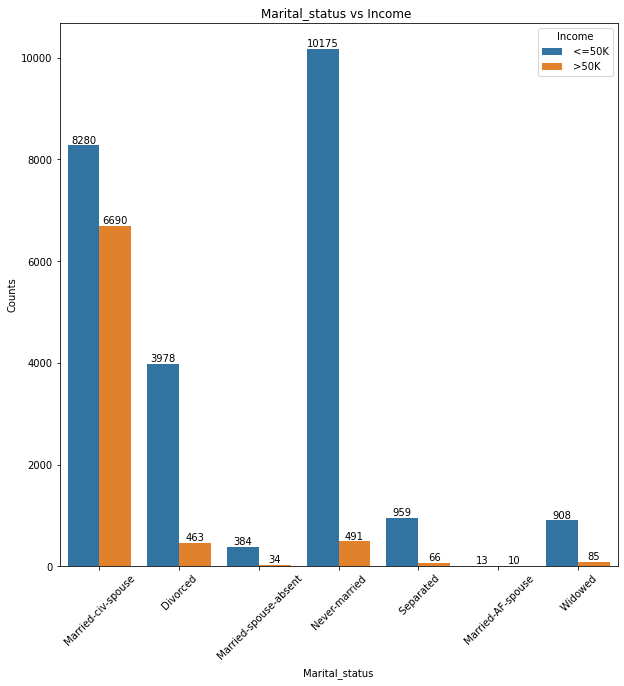

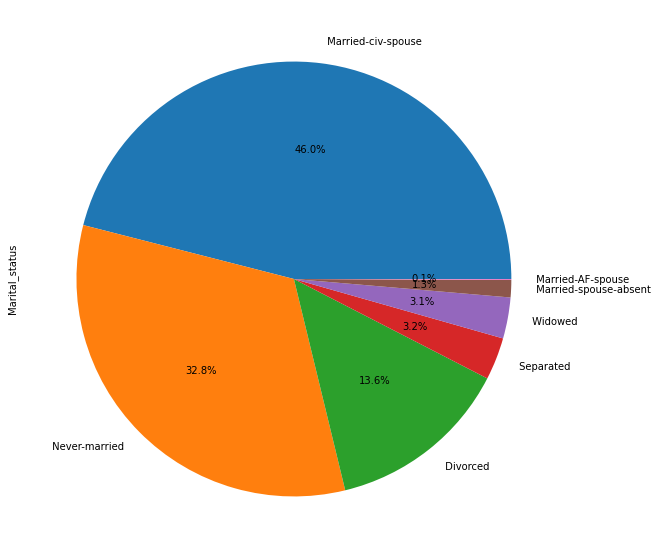

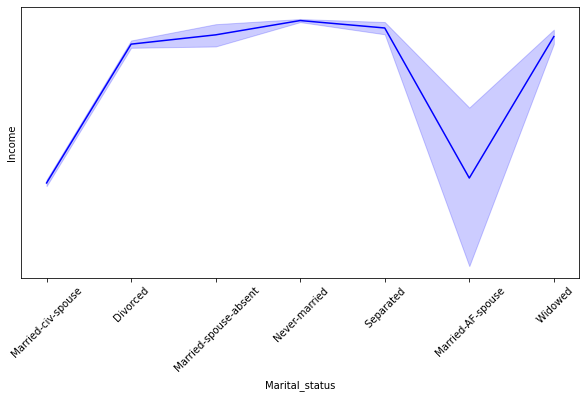

In [32]:
Marital_status = df.Marital_status.value_counts()
plt.figure(figsize = (10,10))
df_Marital_status = sns.countplot(x='Marital_status', hue='Income',data = df)
df_Marital_status.set_title('Marital_status vs Income ')
df_Marital_status.set_xlabel('Marital_status')
df_Marital_status.set_ylabel('Counts')
plt.xticks(rotation = 45)
for i in df_Marital_status.containers:
    df_Marital_status.bar_label(i)
    
# Percentage of workclass
plt.figure(figsize = (10,10))
Marital_status.plot(kind = 'pie', autopct = '%1.1f%%')


plt.figure(figsize=(10,5))
sns.lineplot(x="Marital_status", y="Income",data=df, color='blue')
plt.xticks(rotation = 45)
plt.show()

## Observations

### Marital_status counts

In [33]:
# Marital_status            Counts
#  Married-civ-spouse       14970
#  Never-married            10666
#  Divorced                  4441
#  Separated                 1025
#  Widowed                    993
#  Married-spouse-absent      418
#  Married-AF-spouse           23

#### People having most of the marital status Married-civ-spouse and very less people having marital status Married-AF-spouse as per above count.

In [34]:
# Marital_status          Income     Counts
#  Divorced                <=50K     3978
#                          >50K       463
#  Married-AF-spouse       <=50K       13
#                          >50K        10
#  Married-civ-spouse      <=50K     8280
#                          >50K      6690
#  Married-spouse-absent   <=50K      384
#                          >50K        34
#  Never-married           <=50K    10175
#                          >50K       491
#  Separated               <=50K      959
#                          >50K        66
#  Widowed                 <=50K      908
#                          >50K        85

#### Married civ spouse are getting more than 50k salaries while rest of the are getting lower income

#### Pie Chart

46% percent of the people are having marital status Married-civ-spouse and very less people having status Married-AF-spouse with ratio 0.1 %

#### Line Chart

Married-AF-spouse marital status getting higher income according to their people ratio.

## Occupation with respect to Income

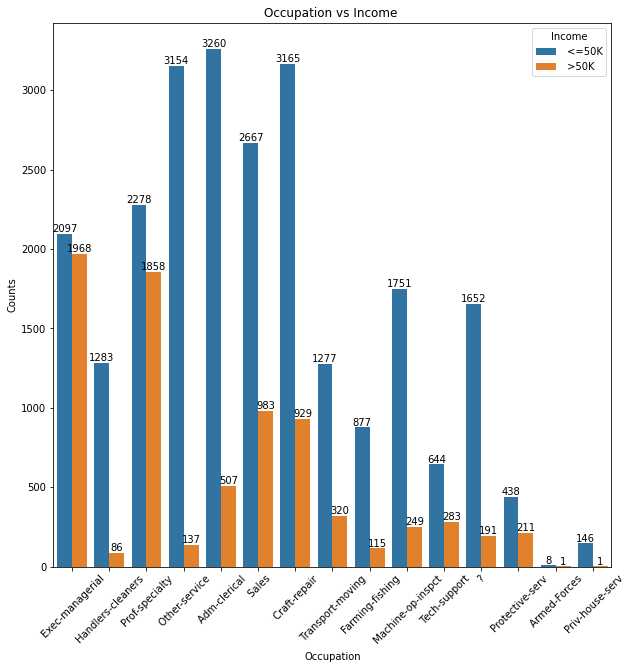

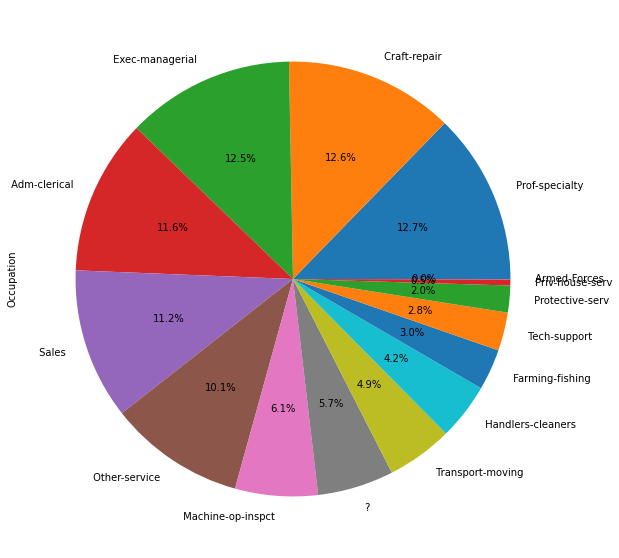

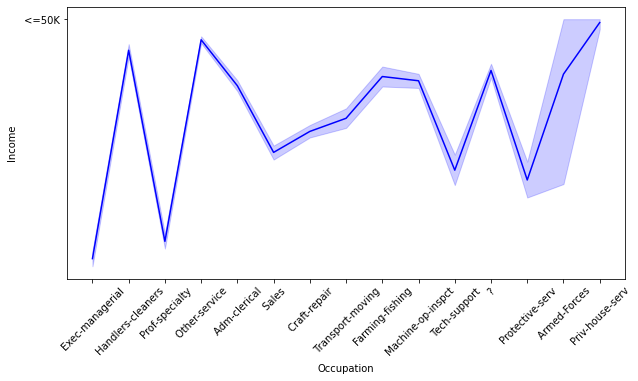

In [35]:
Occupation = df.Occupation.value_counts()
plt.figure(figsize = (10,10))
df_Occupation = sns.countplot(x='Occupation', hue='Income',data = df)
df_Occupation.set_title('Occupation vs Income ')
df_Occupation.set_xlabel('Occupation')
df_Occupation.set_ylabel('Counts')
plt.xticks(rotation = 45)
for i in df_Occupation.containers:
    df_Occupation.bar_label(i)
    
# Percentage of workclass
plt.figure(figsize = (10,10))
Occupation.plot(kind = 'pie', autopct = '%1.1f%%')


plt.figure(figsize=(10,5))
sns.lineplot(x="Occupation", y="Income",data=df, color='blue')
plt.xticks(rotation = 45)
plt.show()

### Observations

#### Occupation Counts

In [36]:
# Occupation           Counts
#  Prof-specialty       4136
#  Craft-repair         4094
#  Exec-managerial      4065
#  Adm-clerical         3767
#  Sales                3650
#  Other-service        3291
#  Machine-op-inspct    2000
#  ?                    1843
#  Transport-moving     1597
#  Handlers-cleaners    1369
#  Farming-fishing       992
#  Tech-support          927
#  Protective-serv       649
#  Priv-house-serv       147
#  Armed-Forces            9

  Prof-specialty are higher people while armed forces are only 9 as per census dataset.

#### Occupation with respect to Income

In [37]:
# Occupation          Income    Counts
#  ?                   <=50K    1652
#                      >50K      191
#  Adm-clerical        <=50K    3260
#                      >50K      507
#  Armed-Forces        <=50K       8
#                      >50K        1
#  Craft-repair        <=50K    3165
#                      >50K      929
#  Exec-managerial     <=50K    2097
#                      >50K     1968
#  Farming-fishing     <=50K     877
#                      >50K      115
#  Handlers-cleaners   <=50K    1283
#                      >50K       86
#  Machine-op-inspct   <=50K    1751
#                      >50K      249
#  Other-service       <=50K    3154
#                      >50K      137
#  Priv-house-serv     <=50K     146
#                      >50K        1
#  Prof-specialty      <=50K    2278
#                      >50K     1858
#  Protective-serv     <=50K     438
#                      >50K      211
#  Sales               <=50K    2667
#                      >50K      983
#  Tech-support        <=50K     644
#                      >50K      283
#  Transport-moving    <=50K    1277
#                      >50K      320

#### People with Exec-managerial occupation are high in number of getting greater than 50k income.

#### Pie Chart

12.7 percentage of the people having occupation of prof spec and very less people having occupation armed forces.

#### Line Chart

Exec-managerial occupation are high in number of getting greater than 50k income.

## Relationship with respect to Income

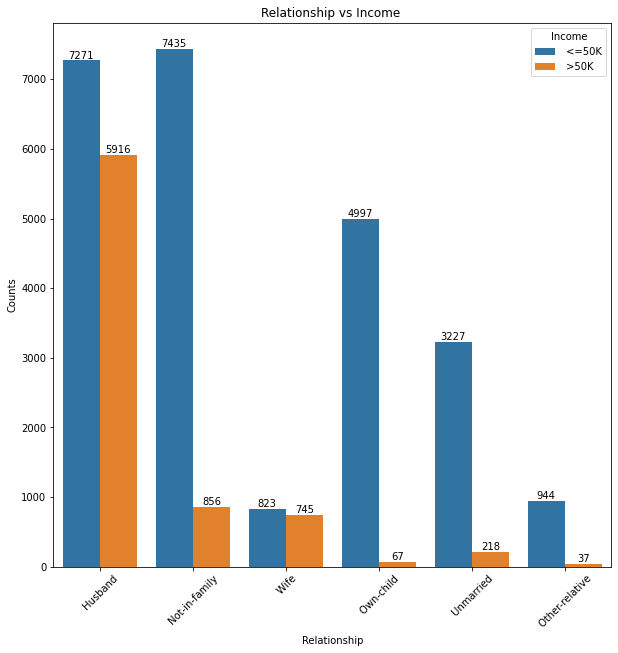

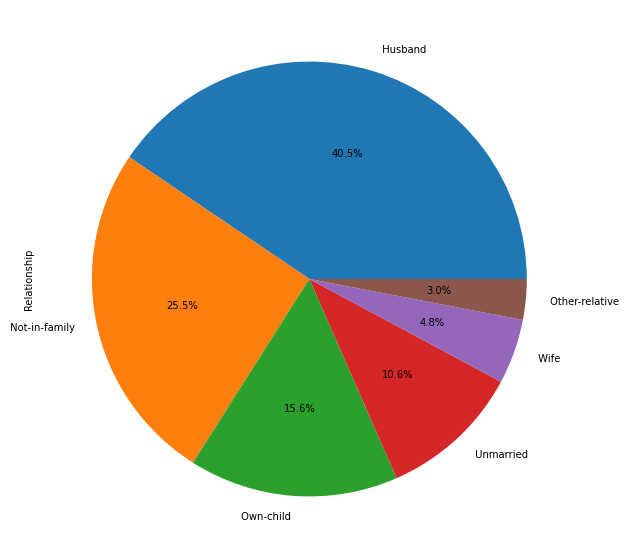

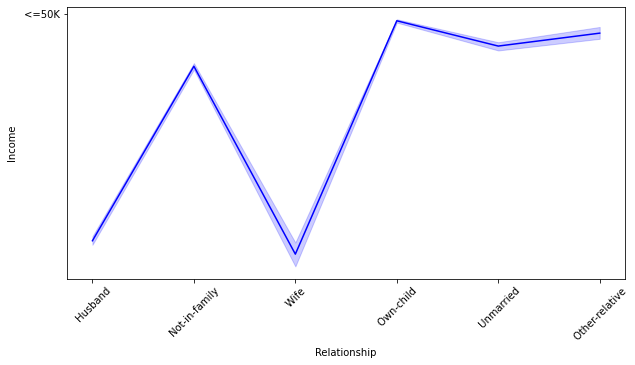

In [38]:
Relationship = df.Relationship.value_counts()
plt.figure(figsize = (10,10))
df_Relationship = sns.countplot(x='Relationship', hue='Income',data = df)
df_Relationship.set_title('Relationship vs Income ')
df_Relationship.set_xlabel('Relationship')
df_Relationship.set_ylabel('Counts')
plt.xticks(rotation = 45)
for i in df_Relationship.containers:
    df_Relationship.bar_label(i)
    
# Percentage of workclass
plt.figure(figsize = (10,10))
Relationship.plot(kind = 'pie', autopct = '%1.1f%%')


plt.figure(figsize=(10,5))
sns.lineplot(x="Relationship", y="Income",data=df, color='blue')
plt.xticks(rotation = 45)
plt.show()

### Observations

#### Relationship counts

In [39]:
# Relationship       Counts
#  Husband           13187
#  Not-in-family      8291
#  Own-child          5064
#  Unmarried          3445
#  Wife               1568
#  Other-relative      981

#### Relationship counts with respect to Income

In [40]:
#  Relationship     Income  Counts
#  Husband          <=50K    7271
#                   >50K     5916
#  Not-in-family    <=50K    7435
#                   >50K      856
#  Other-relative   <=50K     944
#                   >50K       37
#  Own-child        <=50K    4997
#                   >50K       67
#  Unmarried        <=50K    3227
#                   >50K      218
#  Wife             <=50K     823
#                   >50K      745

Husbands are getting higher income rather than other relationships.

#### Pie Chart

40.5 percent of the relationship are of husbands and very less approx 1 percent of the people are in relationship of other relative.

#### Line Chart

Husbands and wife are getting income greater than 50k with respect to their people ratio.

## Race with respect to Income

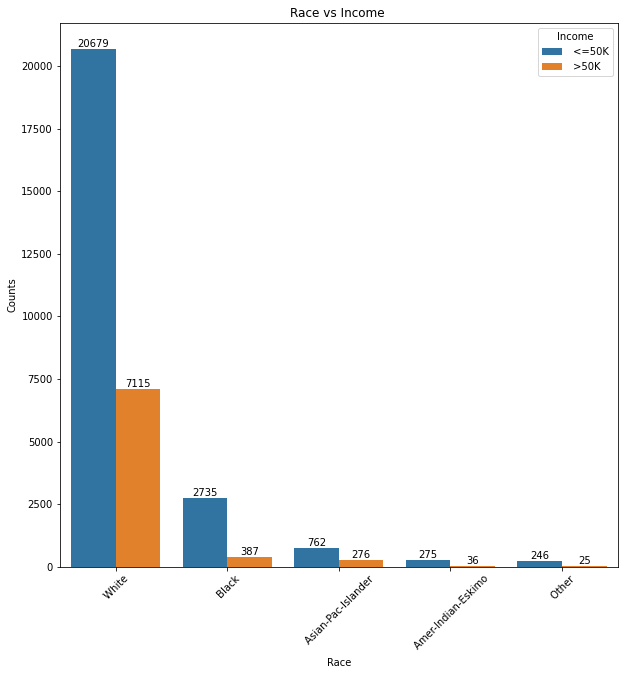

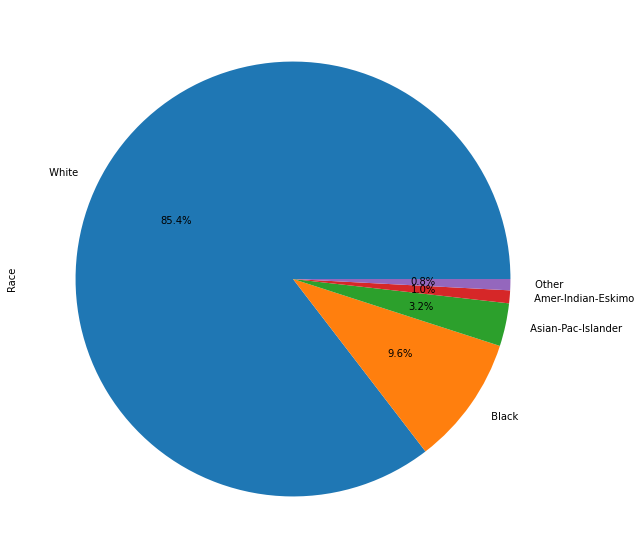

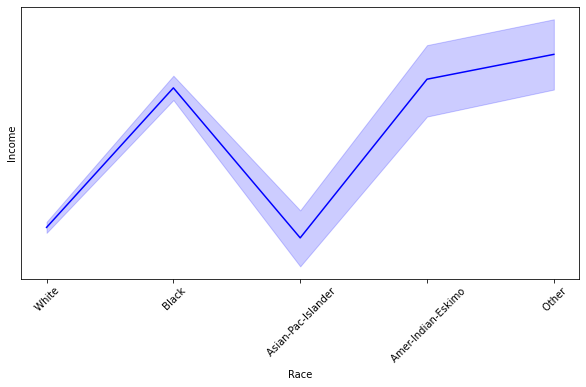

In [41]:
Race = df.Race.value_counts()
plt.figure(figsize = (10,10))
df_Race = sns.countplot(x='Race', hue='Income',data = df)
df_Race.set_title('Race vs Income ')
df_Race.set_xlabel('Race')
df_Race.set_ylabel('Counts')
plt.xticks(rotation = 45)
for i in df_Race.containers:
    df_Race.bar_label(i)
    
# Percentage of workclass
plt.figure(figsize = (10,10))
Race.plot(kind = 'pie', autopct = '%1.1f%%')


plt.figure(figsize=(10,5))
sns.lineplot(x="Race", y="Income",data=df, color='blue')
plt.xticks(rotation = 45)
plt.show()

### Observations

#### Race counts

In [42]:
#  Race                  Counts
#  White                 27794
#  Black                  3122
#  Asian-Pac-Islander     1038
#  Amer-Indian-Eskimo      311
#  Other                   271

White people are higher in Race.

#### Race counts with respect to income

In [43]:
#  Race                 Income    Counts
#  Amer-Indian-Eskimo   <=50K      275
#                       >50K        36
#  Asian-Pac-Islander   <=50K      762
#                       >50K       276
#  Black                <=50K     2735
#                       >50K       387
#  Other                <=50K      246
#                       >50K        25
#  White                <=50K    20679
#                       >50K      7115

#### 7115 white people are getting higher income than others and very less amount of people other race are getting 50k plus income.  

#### Pie Chart

85.4 ratio of the people are white and only 0.8 ratio are of other race.

#### Line Chart

White and Asian-Pac-Islander are getting income greater than 50k with respect to their people ratio.

## Sex with respect to Income

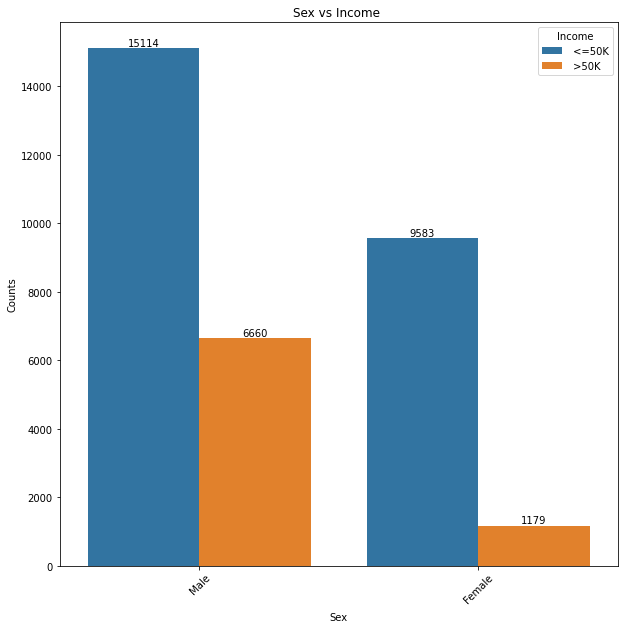

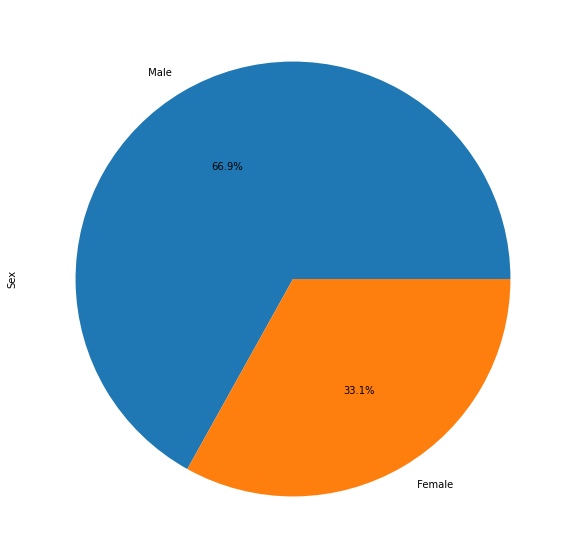

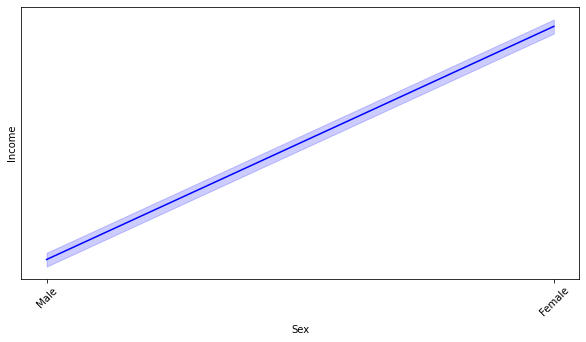

In [44]:
Sex = df.Sex.value_counts()
plt.figure(figsize = (10,10))
df_Sex = sns.countplot(x='Sex', hue='Income',data = df)
df_Sex.set_title('Sex vs Income ')
df_Sex.set_xlabel('Sex')
df_Sex.set_ylabel('Counts')
plt.xticks(rotation = 45)
for i in df_Sex.containers:
    df_Sex.bar_label(i)
    
# Percentage of workclass
plt.figure(figsize = (10,10))
Sex.plot(kind = 'pie', autopct = '%1.1f%%')


plt.figure(figsize=(10,5))
sns.lineplot(x="Sex", y="Income",data=df, color='blue')
plt.xticks(rotation = 45)
plt.show()

### Observations

#### Sex counts

In [45]:
#  Sex       Counts
#  Male      21774
#  Female    10762

Male are higher in number with respect to female.

#### Sex counts with respect to Income

In [46]:
# Sex      Income    Counts
#  Female   <=50K     9583
#           >50K      1179
#  Male     <=50K    15114
#           >50K      6660

6660 Out of 21774 males are getting income more than 50k same as 1179 out of 10762 females are getting income more than 50k 

### Pie Chart

66.9 ratio are of male rest are of females.

### Line Chart

Male are getting income greater than 50k with respect to their people ratio.

## Native_country with respect to Income

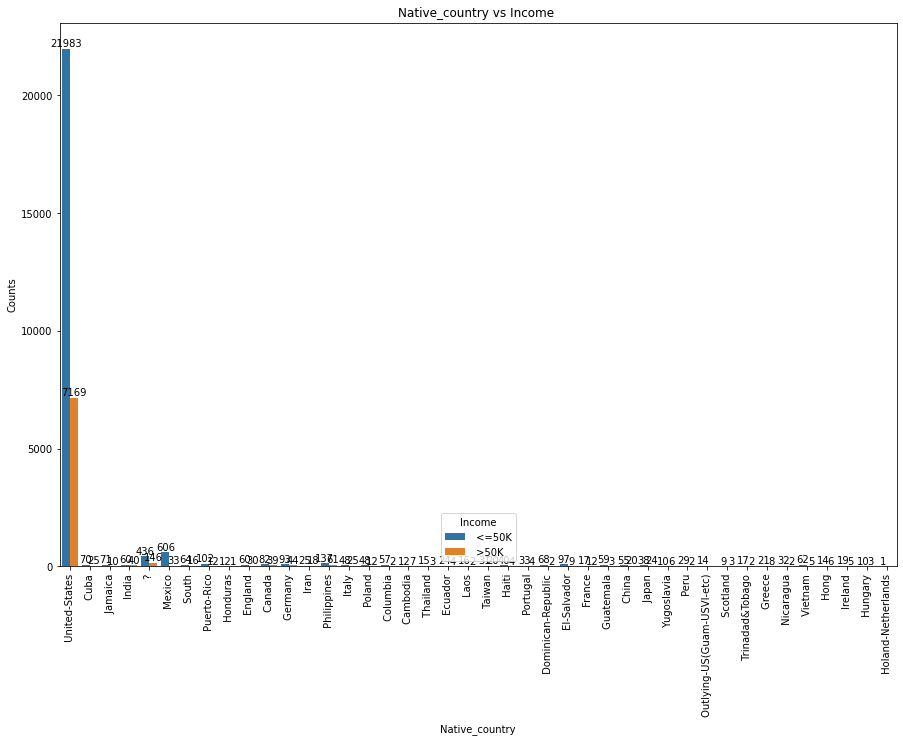

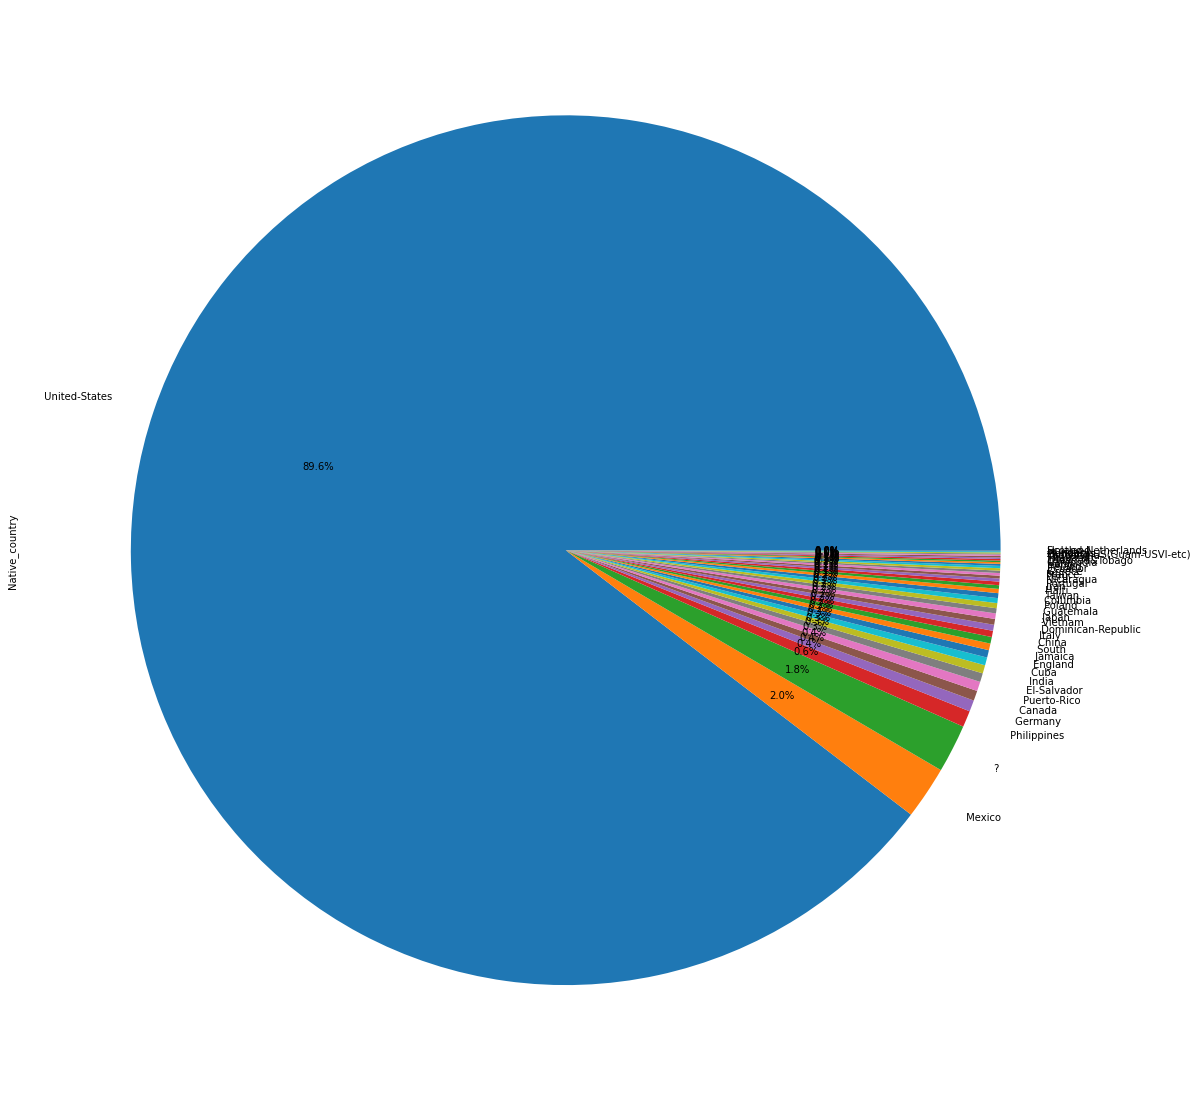

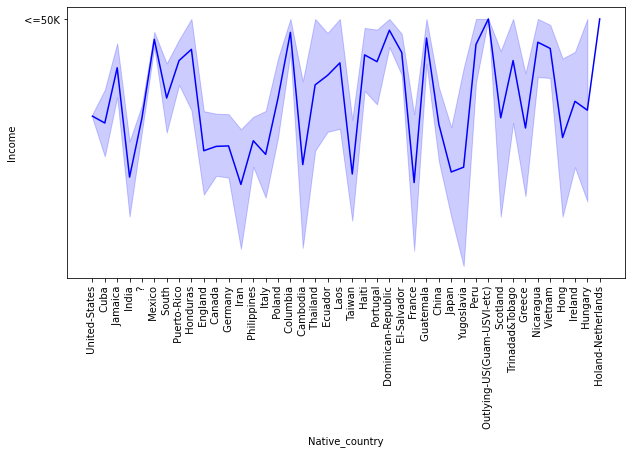

In [47]:
Native_country = df.Native_country.value_counts()
plt.figure(figsize = (15,10))
df_Native_country = sns.countplot(x='Native_country', hue='Income',data = df)
df_Native_country.set_title('Native_country vs Income ')
df_Native_country.set_xlabel('Native_country')
df_Native_country.set_ylabel('Counts')
plt.xticks(rotation = 90)
for i in df_Native_country.containers:
    df_Native_country.bar_label(i)
    
# Percentage of workclass
plt.figure(figsize = (20,20))
Native_country.plot(kind = 'pie', autopct = '%1.1f%%')


plt.figure(figsize=(10,5))
sns.lineplot(x="Native_country", y="Income",data=df, color='blue')
plt.xticks(rotation = 90)
plt.show()

### Observations

#### Native_country counts

In [48]:
# Native_country                 Counts
#  United-States                 29152
#  Mexico                          639
#  ?                               582
#  Philippines                     198
#  Germany                         137
#  Canada                          121
#  Puerto-Rico                     114
#  El-Salvador                     106
#  India                           100
#  Cuba                             95
#  England                          90
#  Jamaica                          81
#  South                            80
#  China                            75
#  Italy                            73
#  Dominican-Republic               70
#  Vietnam                          67
#  Japan                            62
#  Guatemala                        62
#  Poland                           60
#  Columbia                         59
#  Taiwan                           51
#  Haiti                            44
#  Iran                             43
#  Portugal                         37
#  Nicaragua                        34
#  Peru                             31
#  France                           29
#  Greece                           29
#  Ecuador                          28
#  Ireland                          24
#  Hong                             20
#  Cambodia                         19
#  Trinadad&Tobago                  19
#  Laos                             18
#  Thailand                         18
#  Yugoslavia                       16
#  Outlying-US(Guam-USVI-etc)       14
#  Honduras                         13
#  Hungary                          13
#  Scotland                         12
#  Holand-Netherlands                1

#### Native_country counts with respect to Income

In [49]:
# Native_country               Income     Counts
#  ?                            <=50K      436
#                               >50K       146
#  Cambodia                     <=50K       12
#                               >50K         7
#  Canada                       <=50K       82
#                               >50K        39
#  China                        <=50K       55
#                               >50K        20
#  Columbia                     <=50K       57
#                               >50K         2
#  Cuba                         <=50K       70
#                               >50K        25
#  Dominican-Republic           <=50K       68
#                               >50K         2
#  Ecuador                      <=50K       24
#                               >50K         4
#  El-Salvador                  <=50K       97
#                               >50K         9
#  England                      <=50K       60
#                               >50K        30
#  France                       <=50K       17
#                               >50K        12
#  Germany                      <=50K       93
#                               >50K        44
#  Greece                       <=50K       21
#                               >50K         8
#  Guatemala                    <=50K       59
#                               >50K         3
#  Haiti                        <=50K       40
#                               >50K         4
#  Holand-Netherlands           <=50K        1
#  Honduras                     <=50K       12
#                               >50K         1
#  Hong                         <=50K       14
#                               >50K         6
#  Hungary                      <=50K       10
#                               >50K         3
#  India                        <=50K       60
#                               >50K        40
#  Iran                         <=50K       25
#                               >50K        18
#  Ireland                      <=50K       19
#                               >50K         5
#  Italy                        <=50K       48
#                               >50K        25
#  Jamaica                      <=50K       71
#                               >50K        10
#  Japan                        <=50K       38
#                               >50K        24
#  Laos                         <=50K       16
#                               >50K         2
#  Mexico                       <=50K      606
#                               >50K        33
#  Nicaragua                    <=50K       32
#                               >50K         2
#  Outlying-US(Guam-USVI-etc)   <=50K       14
#  Peru                         <=50K       29
#                               >50K         2
#  Philippines                  <=50K      137
#                               >50K        61
#  Poland                       <=50K       48
#                               >50K        12
#  Portugal                     <=50K       33
#                               >50K         4
#  Puerto-Rico                  <=50K      102
#                               >50K        12
#  Scotland                     <=50K        9
#                               >50K         3
#  South                        <=50K       64
#                               >50K        16
#  Taiwan                       <=50K       31
#                               >50K        20
#  Thailand                     <=50K       15
#                               >50K         3
#  Trinadad&Tobago              <=50K       17
#                               >50K         2
#  United-States                <=50K    21983
#                               >50K      7169
#  Vietnam                      <=50K       62
#                               >50K         5
#  Yugoslavia                   <=50K       10
#                               >50K         6

United - States people are more in number hence as per dataset they getting more than 50k income.

#### Pie Chart

89.6 Percent of the people are of United States rest 10.39 percent are of other countries.

#### Line Chart

As per line chart these countries India, Iran, Cambodia, Taiwan, France are getting income greater than 50k with respect to their people ratio.

### As per above all observations we find that some of the rows/columns having ? symbol which means unknown hence for better model we are replacing it with most frequent values.

### Native Country

In [50]:
df['Native_country'] = df['Native_country'].str.replace('?', 'United-States')

### Workclass

In [51]:
df['Workclass'] = df['Workclass'].str.replace('?', 'Private')

### Occupation

In [52]:
df['Occupation'] = df['Occupation'].str.replace('?', 'Prof-specialty')

## Numerical Values

In [53]:
df_integer

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')

### Categorical Plot

## Age with respect to Income

<Figure size 576x576 with 0 Axes>

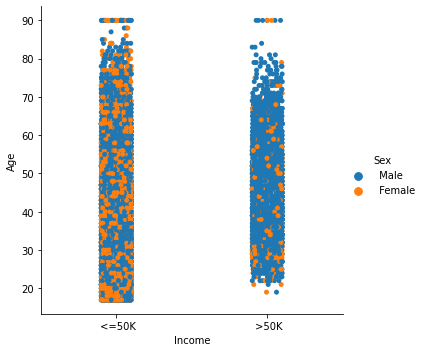

In [54]:
plt.figure(figsize = (8,8))
sns.catplot(x = "Income", y = "Age", hue = 'Sex', data = df)

#### From above graph we find that greater than 50k income having an starting age which are approx 22 to 23 while in lesser than 50k getting salary with starting age 18. 

## Final Weight(Fnlwgt) with respect to Income

<Figure size 576x576 with 0 Axes>

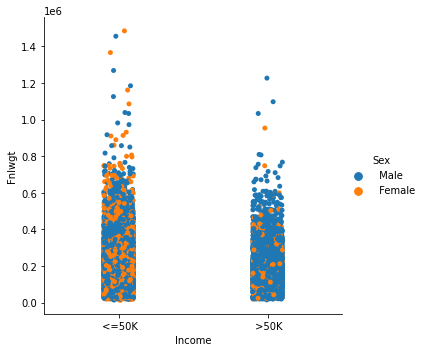

In [55]:
plt.figure(figsize = (8,8))
sns.catplot(x = "Income", y = "Fnlwgt", hue = 'Sex', data = df)

#### People getting salary more than 50k having weight range 0 to 0.7 with having outliers.

## Education_num with respect to Income

<Figure size 576x576 with 0 Axes>

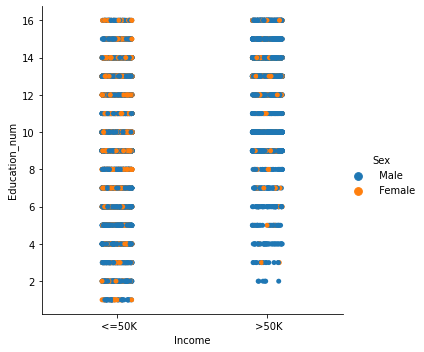

In [56]:
plt.figure(figsize = (8,8))
sns.catplot(x = "Income", y = "Education_num", hue = 'Sex', data = df)

#### Getting salary greater than 50k people having good study status as per above graph information.

## Captial Gain with respect to Income

<Figure size 576x576 with 0 Axes>

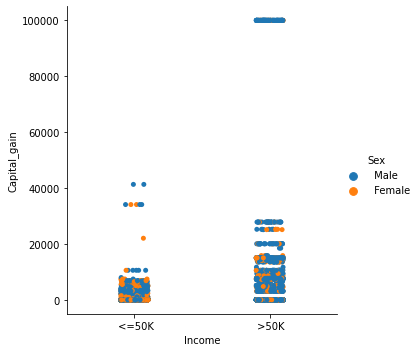

In [57]:
plt.figure(figsize = (8,8))
sns.catplot(x = "Income", y = "Capital_gain", hue = 'Sex', data = df)

#### People having salaries greater than 50k have more capital gain with respect to other peoples.

## Captial Loss with respect to Income

<Figure size 576x576 with 0 Axes>

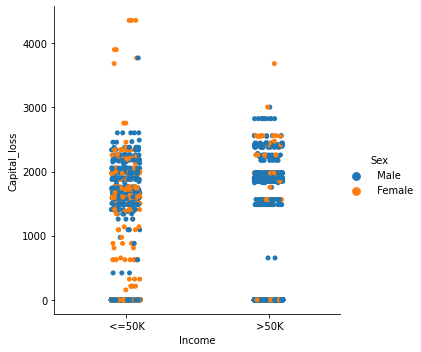

In [58]:
plt.figure(figsize = (8,8))
sns.catplot(x = "Income", y = "Capital_loss", hue = 'Sex', data = df)

#### Capital loss are literaly more in case of people salaries which getting lesser than <=50k.

## Hours_per_week with respect to Income

<Figure size 576x576 with 0 Axes>

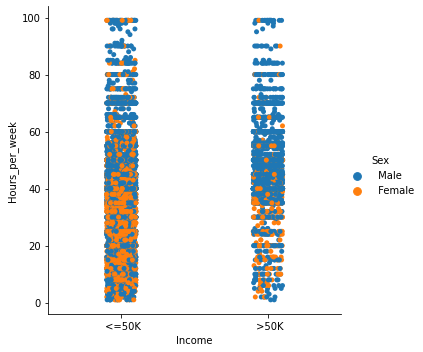

In [59]:
plt.figure(figsize = (8,8))
sns.catplot(x = "Income", y = "Hours_per_week", hue = 'Sex', data = df)

#### As per above graph we find that both income people having similar working hours per week.

### Boxplot

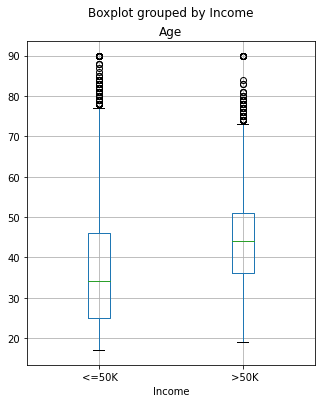

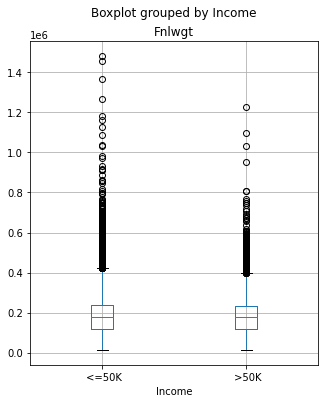

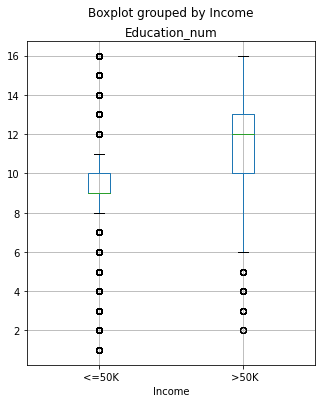

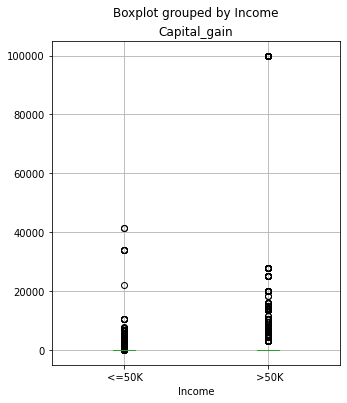

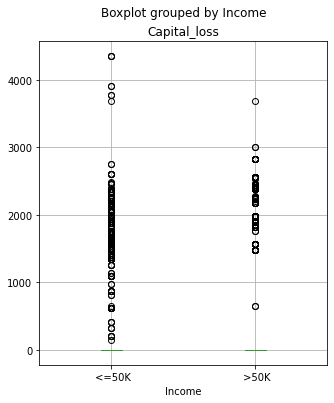

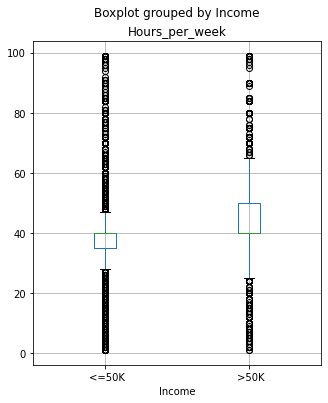

In [60]:
for i in df_integer:
    df.boxplot(column = i, by = 'Income', figsize = (5,6))    

#### From above graph we find that most of the integer columns dataset having outliers.

## Bivariate Analysis of Integer Dataset

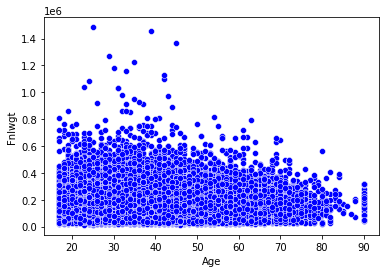

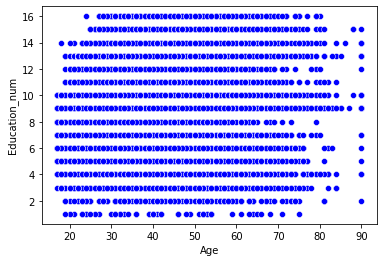

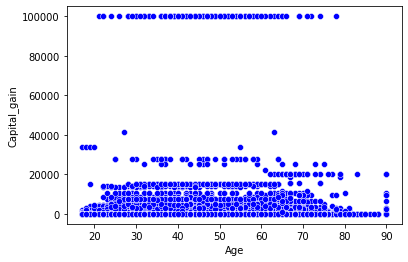

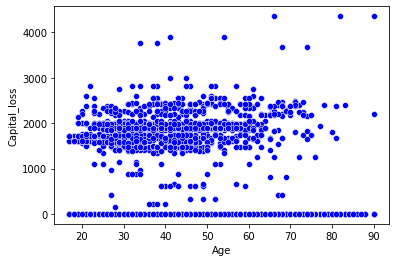

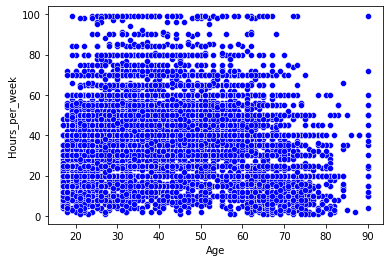

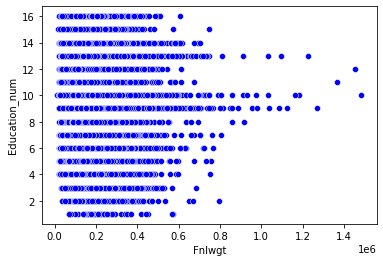

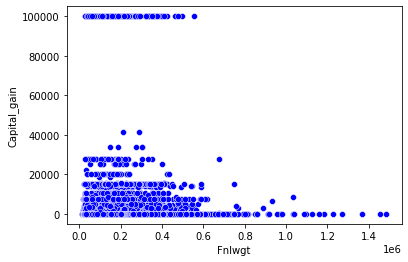

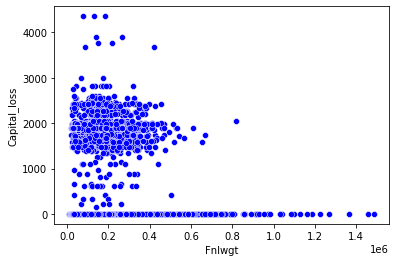

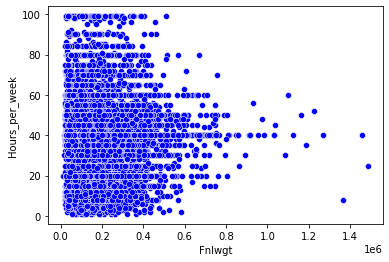

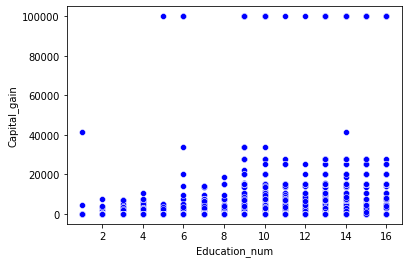

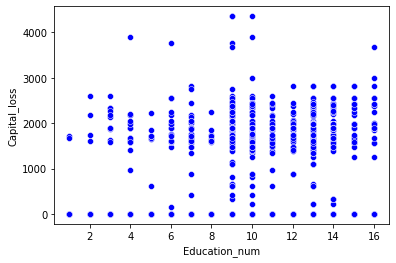

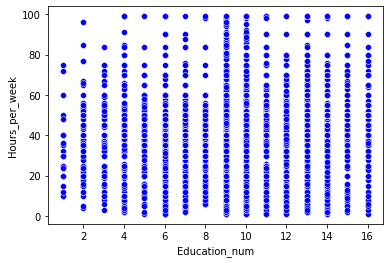

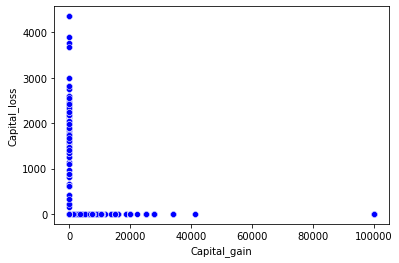

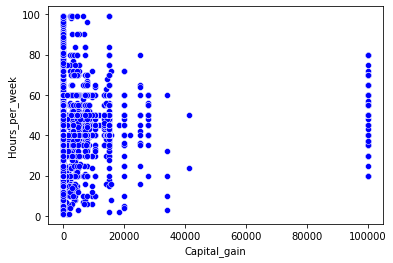

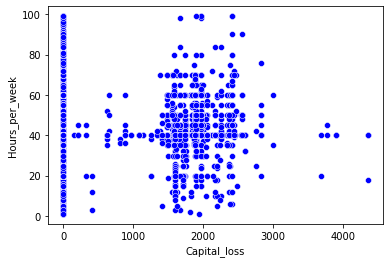

In [63]:
for i in range(len(df_integer)):
    for j in df_integer[i+1:]:
        plt.figure()
        sns.scatterplot(df[df_integer[i]], df[j], color = 'b')

#### From above graphs we didn't find any common format of distribution. But in case of capital gain and capital loss shows perpendicular relations with each other.

## Checking Distribution of the Dataset

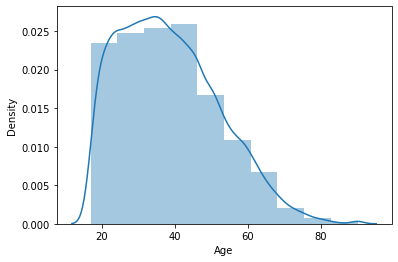

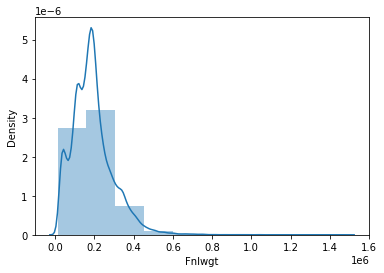

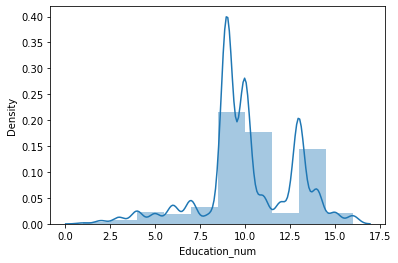

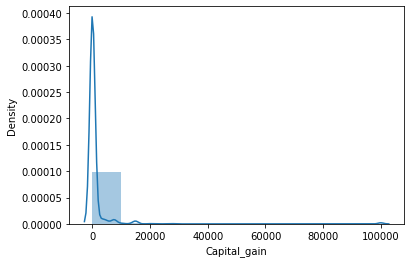

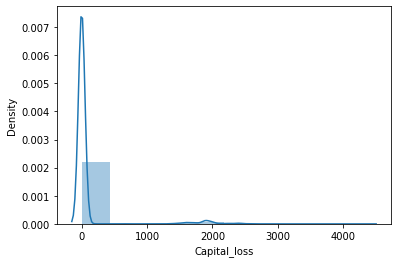

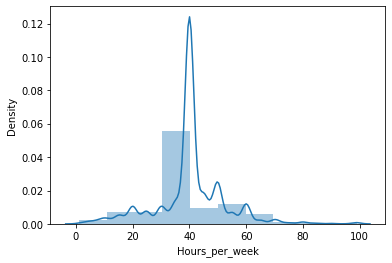

In [64]:
for i in df_integer:
    plt.figure()
    sns.distplot(df[i], bins = 10)

#### Observations:-

More of the people population lies in range of 22 to 38 approx as per above distribution graph.

Final weight having mostly range in between 0.1 to 0.6.

With range of Education_num 8 to 11 are more with respect to others.

Capital gain are in the range of 0 to 15000 approx.

Capital losses are in the range of 0 to 450 approx. 

Mostly people spend 40 hours per week approx.

## Violin Plot

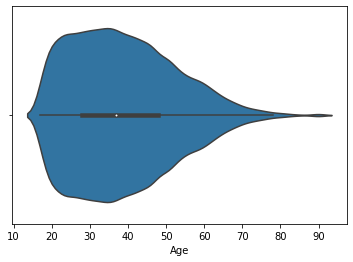

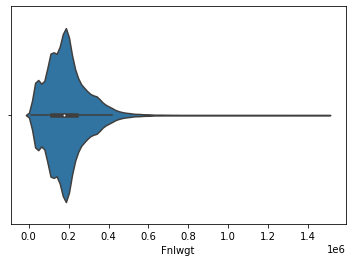

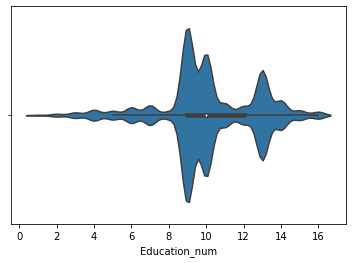

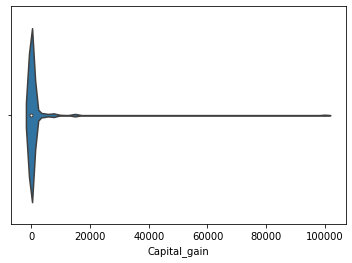

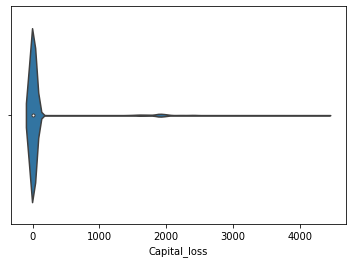

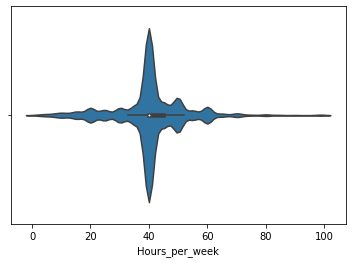

In [65]:
for i in df_integer:
    plt.figure()
    sns.violinplot(df[i])

#### Observations:-
    
More of the people population lies in density range of 22 to 38 approx as per above distribution graph.

Final weight having mostly density range in between 0.1 to 0.6.

With density range of Education_num 8 to 11 are more with respect to others.

Capital gain are more in the density range of 0 to 15000 approx.

Capital losses are more in the density range of 0 to 450 approx. 

Mostly people spend 40 hours per week approx.

## Checking Outliers

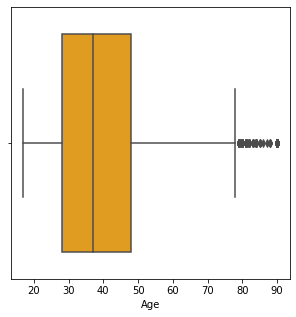

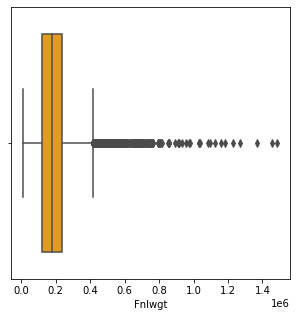

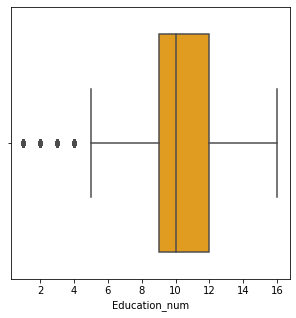

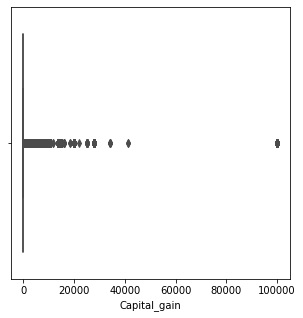

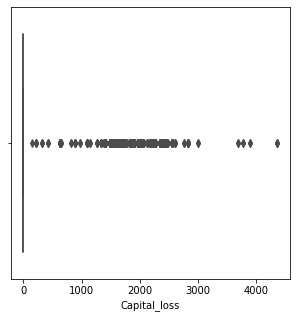

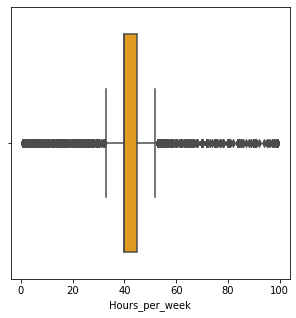

In [66]:
for i in df_integer:
    plt.figure(figsize = (5,5))
    sns.boxplot(df[i], orient='v', color='orange')

#### Most of the integer dataset having outliers but we find that hours per week, capital loss and gain having to much outliers.

## Checking Skewness

In [67]:
df[df_integer].skew()

Age                0.557657
Fnlwgt             1.447695
Education_num     -0.309454
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
dtype: float64

<Figure size 72x36 with 0 Axes>

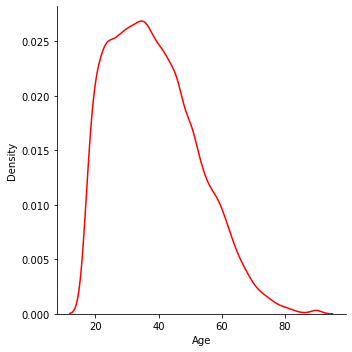

<Figure size 72x36 with 0 Axes>

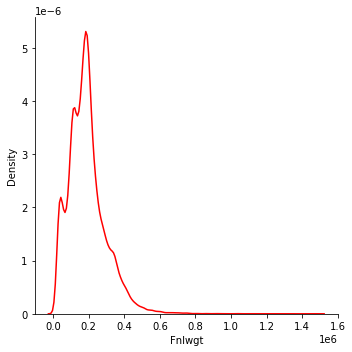

<Figure size 72x36 with 0 Axes>

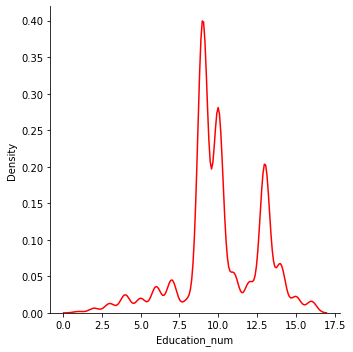

<Figure size 72x36 with 0 Axes>

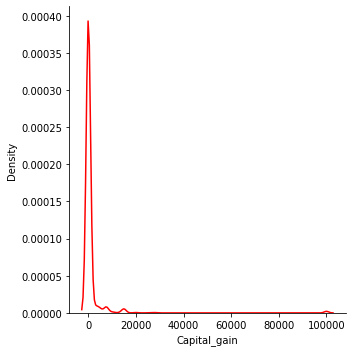

<Figure size 72x36 with 0 Axes>

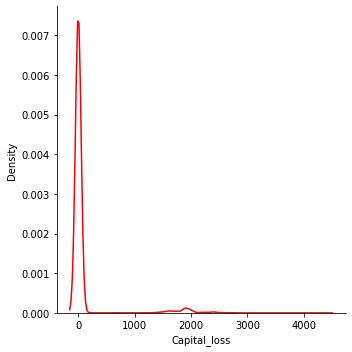

<Figure size 72x36 with 0 Axes>

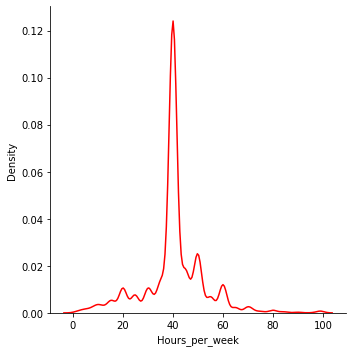

In [68]:
for i in df_integer:
    plt.figure(figsize = (1,0.5))
    sns.displot(df[i], kind = 'kde', color = 'red',)

#### Observations:-

Age, Fnlwgt, Education_num, Capital_gain, Capital_loss are  right skewed towards the dataset.
Hours_per_week are seems normally distribution but having right skewness towards the dataset.

## Checking Overall of the Dataset by Pairplot

<Figure size 1080x1080 with 0 Axes>

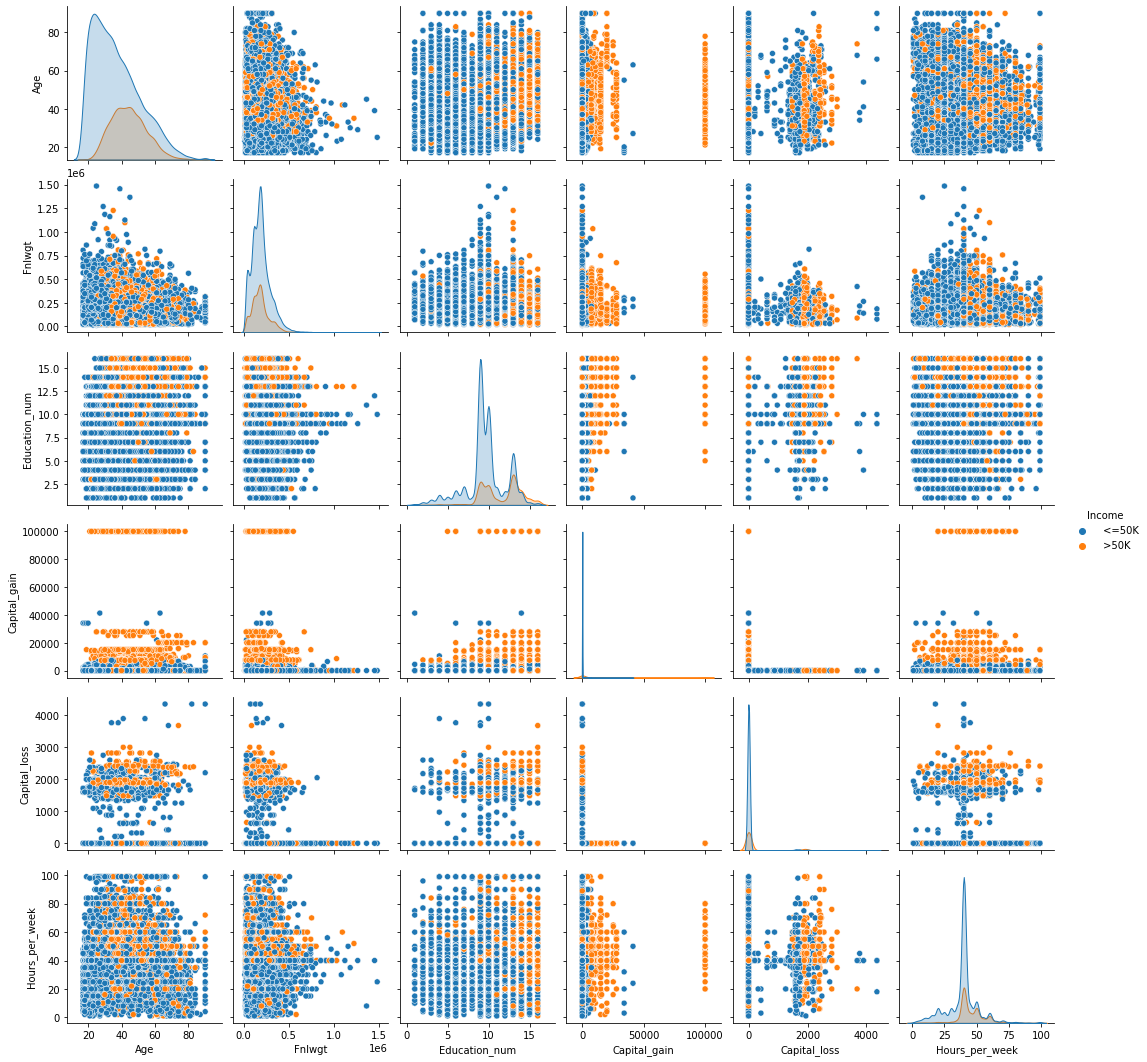

In [41]:
plt.figure(figsize = (15,15))
sns.pairplot(df, hue = "Income")

Here we match analysis data with a single graph set.

All observations match as per data analysis

## Preprocessing of the dataset

In [42]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:>

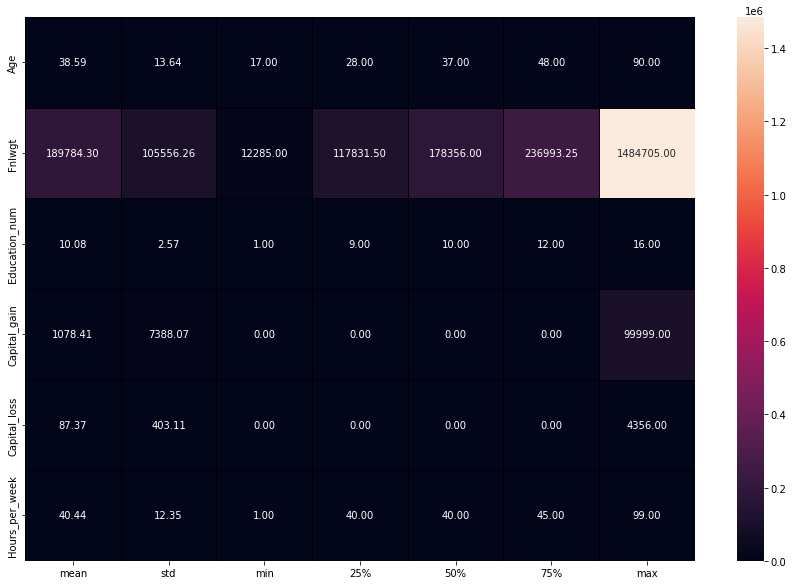

In [43]:
plt.figure(figsize = (15,10))
sns.heatmap(df.describe()[1:].transpose(), annot = True, linecolor='black', linewidths=0.5, fmt = '.2f')

#checking description visually

#### From above information we find that max values of Fnlwgt, Capital gain and capital loss are much higher than its overall values. Due to these columns of dataset probably having outliers in the dataset.

## Checking Correlation of the Dataset

In [44]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076448,0.036224,0.077676,0.057745,0.068515
Fnlwgt,-0.076448,1.000000,-0.043353,0.000433,-0.010267,-0.018900
Education_num,0.036224,-0.043353,1.000000,0.122661,0.079901,0.148426
Capital_gain,0.077676,0.000433,0.122661,1.000000,-0.031638,0.078408
Capital_loss,0.057745,-0.010267,0.079901,-0.031638,1.000000,0.054229
Hours_per_week,0.068515,-0.018900,0.148426,0.078408,0.054229,1.000000


<AxesSubplot:>

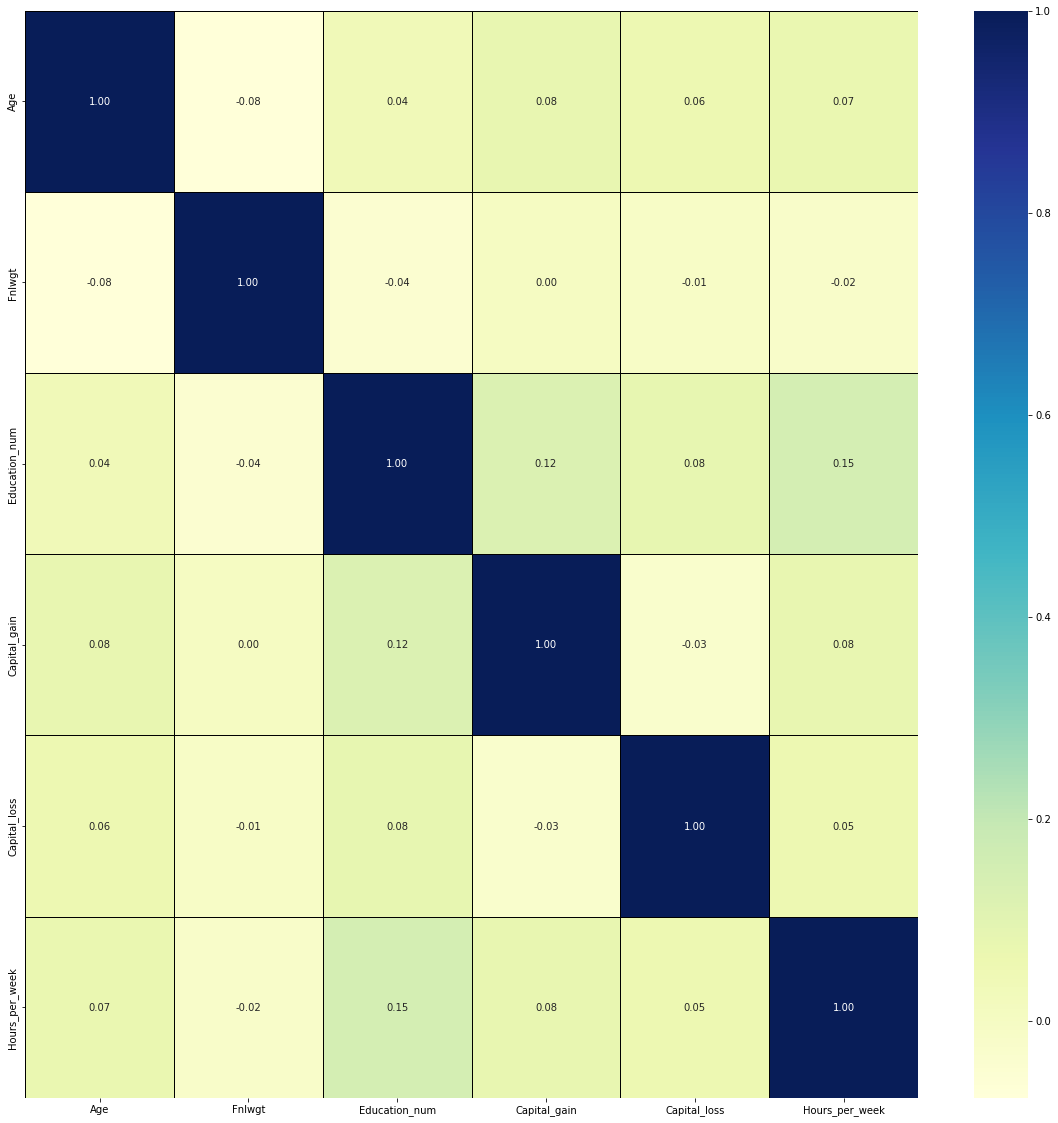

In [45]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, linecolor = 'black', linewidths = 1, fmt = '.2f', cmap="YlGnBu" )

#### As per graph we find that non of the columns of datset are highly correlated.

## Checking Positive and Negative Correlation

<AxesSubplot:>

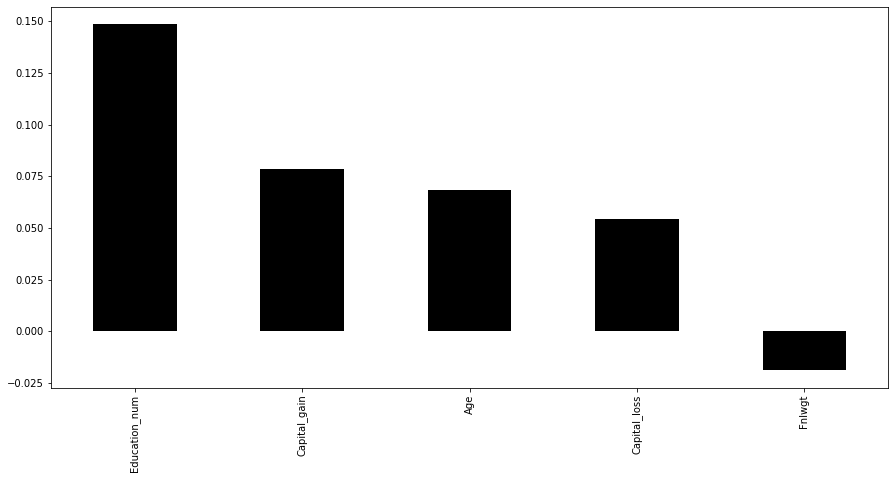

In [46]:
plt.figure(figsize = (15,7))
df.corr()['Hours_per_week'].sort_values(ascending = False).drop('Hours_per_week').plot(kind = 'bar', color = 'k')

#### Fnlwgt shows some negative correlation toward the dataset.

## Removing Outliers from the Dataset

In [29]:
from scipy.stats import zscore

z = np.abs(zscore(df[df_integer]))

# taking thresold value = 3
#np.where(z>3)

df_new = df[(z<3).all(axis = 1)]

In [30]:
np.where(z>3)  

(array([    9,    22,    27, ..., 32500, 32500, 32506], dtype=int64),
 array([5, 4, 5, ..., 0, 5, 5], dtype=int64))

In [31]:
print(df_new.shape)
print(df.shape)

(29808, 15)
(32536, 15)


In [32]:
percentage = round((32536-29808)/32536*100,2)
print(percentage, "Percentage of data loss")  

8.38 Percentage of data loss


## Removing Outliers with Interquartile Method

In [33]:
Q1 = df[df_integer].quantile(.25)
Q3 = df[df_integer].quantile(.75)
IQR = Q3 - Q1

In [34]:
df_IQR = df[~((df<(Q1 - 1.5*IQR)) | (df>(Q3 + 1.5*IQR))).any(axis = 1)]

In [35]:
print(df_IQR.shape)
print(df.shape)

(18983, 15)
(32536, 15)


In [36]:
percentage = round((32536-18983)/32536*100,2)
print(percentage, "Percentage of data loss")  

41.66 Percentage of data loss


### From above two methods of removing outliers we find that Zscore give lesser data loss with respect to interquartile method hence we are selecting Zscore method for removing outliers.

## Checking Outliers after removal

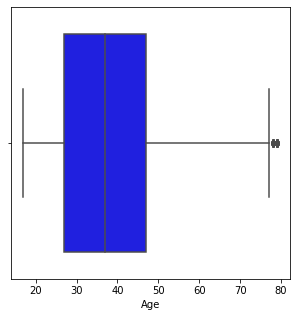

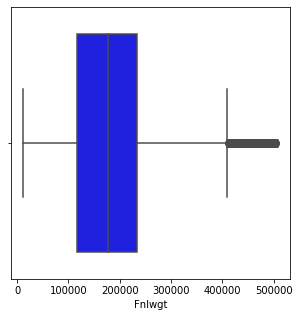

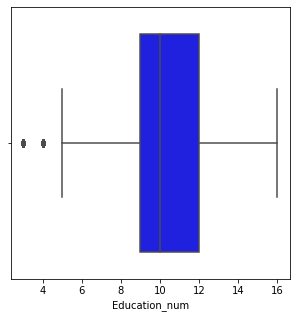

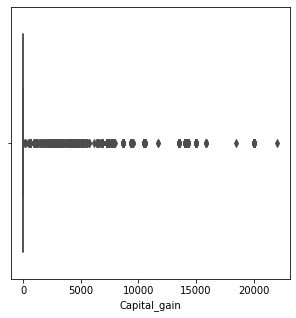

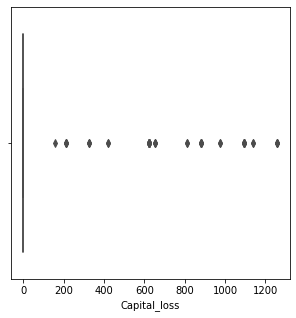

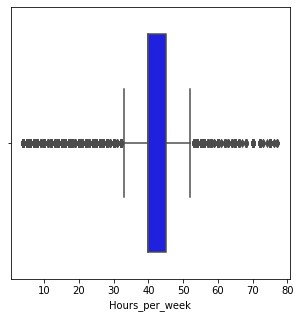

In [37]:
for i in df_integer:
    plt.figure(figsize = (5,5))
    sns.boxplot(df_new[i], orient='v', color='blue')

#### As per above graph we find that some of the outliers being removed from the dataset.

## Removing Skewness

In [38]:
from sklearn.preprocessing import PowerTransformer
pw = PowerTransformer('yeo-johnson')

In [39]:
df_new.skew()  # checking skewness

Age                0.491125
Fnlwgt             0.635160
Education_num     -0.169811
Capital_gain       4.941892
Capital_loss      29.651762
Hours_per_week    -0.353124
dtype: float64

#### As per skewness we can see that Capital loss show high positive skewness towards the dataset. Hence we need to fix it.

In [40]:
df_skew = df_new.copy()   # making a new variable so that main dataframe not disturbed

In [41]:
skew_x = pw.fit_transform(df_skew[df_integer])

In [42]:
skew_x = pd.DataFrame(data = skew_x, columns = df_integer)

In [43]:
skew_x.skew()

Age               -0.017077
Fnlwgt            -0.034773
Education_num      0.023046
Capital_gain       3.072803
Capital_loss      24.860889
Hours_per_week     0.107978
dtype: float64

#### Still skewness are much higher of capital loss, gain hence we are trying to find best method to remove skewness

### np.log

In [44]:
skew_x['Capital_loss'] = np.log(skew_x['Capital_loss'])
skew_x['Capital_loss'].skew()

0

### Using np.log method becomes all values to zero hence due to small dataset we are not considering it.

### np.sqrt

In [45]:
skew_x['Capital_loss'] = np.sqrt(skew_x['Capital_loss'])
skew_x['Capital_loss'].skew()

0

### Using np.sqrt method becomes all values to zero hence due to small dataset we are not considering it.

### Reciprocal method

In [46]:
skew_x['Capital_loss'] = 1/(skew_x['Capital_loss'])
skew_x['Capital_loss'].skew()

0

### Reciprocal method shows same value as it is comes in above methods.

### From above procedure we find that removing skewness below value totally zero. Hence we are not considering it.

## Converting Categorical Dataset to Machine Understandable Form using Label Encoder

In [47]:
from sklearn.preprocessing import LabelEncoder
lec = LabelEncoder()
for i in df_new.columns:
    if df_new[i].dtypes == 'object':
        df_new[i] = lec.fit_transform(df_new[i].values.reshape(-1,1))

In [48]:
df_new.head(10)  #Checking result of label encoder

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,8,13,2,4,0,4,1,0,0,13,38,0
1,38,4,215646,10,9,0,6,1,4,1,0,0,40,38,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,38,0
3,28,4,338409,8,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,11,14,2,4,5,4,0,0,0,40,38,0
5,49,4,160187,5,5,3,8,1,2,0,0,0,16,22,0
6,52,6,209642,10,9,2,4,0,4,1,0,0,45,38,1
7,31,4,45781,11,14,4,10,1,4,0,14084,0,50,38,1
8,42,4,159449,8,13,2,4,0,4,1,5178,0,40,38,1
10,30,7,141297,8,13,2,10,0,1,1,0,0,40,18,1


## Dividing data for feature selection

In [49]:
x = df_new.drop('Income', axis = 1)
y = df_new['Income']

In [50]:
print('shape of x', x.shape)
print('Shape of y', y.shape)

shape of x (29808, 14)
Shape of y (29808,)


## Checking multicolinearity of the dataset

In [51]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
def calc_vif(x):
    
    vif = pd.DataFrame()
    vif['Variance'] = x.columns
    vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif


In [53]:
calc_vif(x[df_integer])  # checking VIF of integer columns

,Variance,VIF Factor
0,Age,7.680061
1,Fnlwgt,4.188762
2,Education_num,12.106980
3,Capital_gain,1.082613
4,Capital_loss,1.002008
5,Hours_per_week,11.374005


#### Dataset is too small hence we need to drop one by one multicollinearity columns for better understanding. From above code we find that Education_num is higly correlated from others towards the dataset. Hence we need to drop it.

In [54]:
x.drop('Education_num', inplace = True, axis = 1)

In [55]:
calc_vif(x[['Age', 'Fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week']])  # checking VIF again of integer columns after removing Education_num

,Variance,VIF Factor
0,Age,6.665786
1,Fnlwgt,3.926293
2,Capital_gain,1.078362
3,Capital_loss,1.001962
4,Hours_per_week,7.723530


#### After removing Education_num we find that VIF factor are comes under the acceptable zone.

## Sythetic Minority Oversampling Technique

<AxesSubplot:xlabel='Income', ylabel='count'>

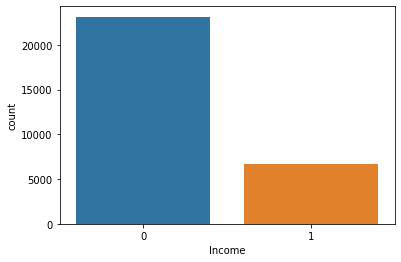

In [56]:
sns.countplot(y)

### We find that Income values are not balanced and training these dataset for machine learning show biased prediction hence we need to fix it.

In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
sm = SMOTE()
x, y = sm.fit_resample(x, y)

In [59]:
print(x.shape)
print(y.shape)

(46312, 13)
(46312,)


0    23156
1    23156
Name: Income, dtype: int64


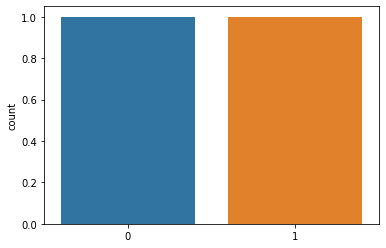

In [60]:
sns.countplot(y.unique())
print(y.value_counts())

#### Using Get Dummies Method to prevent overfitting of Model as Model having so many columns with Multiple Unique Values

In [61]:
x = pd.get_dummies(data = x, columns = ['Workclass', 'Education', 'Marital_status', 'Occupation','Relationship', 'Race', 'Sex', 'Native_country'])

In [62]:
print(x.shape)
x.head(1)

(46312, 104)


,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week,Workclass_0,Workclass_1,Workclass_2,Workclass_3,Workclass_4,Workclass_5,Workclass_6,Workclass_7,Workclass_8,Education_0,Education_1,Education_2,Education_3,Education_4,Education_5,Education_6,Education_7,Education_8,Education_9,Education_10,Education_11,Education_12,Education_13,Marital_status_0,Marital_status_1,Marital_status_2,Marital_status_3,Marital_status_4,Marital_status_5,Marital_status_6,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Relationship_0,Relationship_1,Relationship_2,Relationship_3,Relationship_4,Relationship_5,Race_0,Race_1,Race_2,Race_3,Race_4,Sex_0,Sex_1,Native_country_0,Native_country_1,Native_country_2,Native_country_3,Native_country_4,Native_country_5,Native_country_6,Native_country_7,Native_country_8,Native_country_9,Native_country_10,Native_country_11,Native_country_12,Native_country_13,Native_country_14,Native_country_15,Native_country_16,Native_country_17,Native_country_18,Native_country_19,Native_country_20,Native_country_21,Native_country_22,Native_country_23,Native_country_24,Native_country_25,Native_country_26,Native_country_27,Native_country_28,Native_country_29,Native_country_30,Native_country_31,Native_country_32,Native_country_33,Native_country_34,Native_country_35,Native_country_36,Native_country_37,Native_country_38,Native_country_39,Native_country_40
0,50,83311,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Scaling Dataset

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [65]:
x[['Age', 'Fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week']] = sc.fit_transform(x[['Age', 'Fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week']])

In [66]:
x.head()

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week,Workclass_0,Workclass_1,Workclass_2,Workclass_3,Workclass_4,Workclass_5,Workclass_6,Workclass_7,Workclass_8,Education_0,Education_1,Education_2,Education_3,Education_4,Education_5,Education_6,Education_7,Education_8,Education_9,Education_10,Education_11,Education_12,Education_13,Marital_status_0,Marital_status_1,Marital_status_2,Marital_status_3,Marital_status_4,Marital_status_5,Marital_status_6,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Relationship_0,Relationship_1,Relationship_2,Relationship_3,Relationship_4,Relationship_5,Race_0,Race_1,Race_2,Race_3,Race_4,Sex_0,Sex_1,Native_country_0,Native_country_1,Native_country_2,Native_country_3,Native_country_4,Native_country_5,Native_country_6,Native_country_7,Native_country_8,Native_country_9,Native_country_10,Native_country_11,Native_country_12,Native_country_13,Native_country_14,Native_country_15,Native_country_16,Native_country_17,Native_country_18,Native_country_19,Native_country_20,Native_country_21,Native_country_22,Native_country_23,Native_country_24,Native_country_25,Native_country_26,Native_country_27,Native_country_28,Native_country_29,Native_country_30,Native_country_31,Native_country_32,Native_country_33,Native_country_34,Native_country_35,Native_country_36,Native_country_37,Native_country_38,Native_country_39,Native_country_40
0,0.817577,-1.081011,-0.331201,-0.030593,-2.780928,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-0.172274,0.330041,-0.331201,-0.030593,-0.143453,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1.065039,0.533432,-0.331201,-0.030593,-0.143453,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-0.997150,1.639029,-0.331201,-0.030593,-0.143453,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.254762,1.065087,-0.331201,-0.030593,-0.143453,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# Feature Selection


### Since output variables having boolean variables hence we use classification model

In [120]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [68]:
class best_model:
    def best_fit(x, y, model):
        random_state_values = []
        for i in range(0,200):
            x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = i, test_size = 0.20)
            model.fit(x_train, y_train)
            pred_train = model.predict(x_train)
            pred_test = model.predict(x_test)

            if round(accuracy_score(y_train, pred_train)*100,1) == round(accuracy_score(y_test, pred_test)*100,1):
                print("At random_state:-", i)
                print("Training accuracy_score is:-", accuracy_score(pred_train, y_train)*100)
                print("Testing accuracy_score is:-", accuracy_score(pred_test, y_test)*100)
                print("\n")
                random_state_values.append(i)
        print("Best fit random_state_values", random_state_values)
    
    
    def final_model(x, y, model, i):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = i)
        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)
        print("At random state", i , "model giving best accuracy score","\n")
        Train_accuracy = accuracy_score(pred_train, y_train)
        Test_accuracy = accuracy_score(pred_test, y_test)
        print('Training accuracy:- ', Train_accuracy*100)
        print('Testing accuracy:- ', Test_accuracy*100)
        print("\n")
        print('--------------------------------------')
        print('Confusion Matrix')
        print(confusion_matrix(pred_test, y_test) )
        print("\n")
        print('Classification Report')
        print(classification_report(pred_test, y_test) )
        

    def cross_val_score(model, x, y):
        for value in range(2,8):
            cv = cross_val_score(model, x, y, cv = value).mean()
            print('cross_val_score', cv*100,'at cv =', value,"\n")


## Model 1 Logisitc Regression

In [69]:
model = LogisticRegression()

In [70]:
best_model.best_fit(x, y, model)   #finding best random state

At random_state:- 23
Training accuracy_score is:- 85.74860320116602
Testing accuracy_score is:- 85.66339198963618


At random_state:- 45
Training accuracy_score is:- 85.72431104753164
Testing accuracy_score is:- 85.70657454388427


At random_state:- 52
Training accuracy_score is:- 85.80258576479797
Testing accuracy_score is:- 85.76055273669438


At random_state:- 78
Training accuracy_score is:- 85.72161191935005
Testing accuracy_score is:- 85.70657454388427


At random_state:- 80
Training accuracy_score is:- 85.74320494480283
Testing accuracy_score is:- 85.70657454388427


At random_state:- 81
Training accuracy_score is:- 85.72701017571325
Testing accuracy_score is:- 85.7173701824463


At random_state:- 90
Training accuracy_score is:- 85.7567005857108
Testing accuracy_score is:- 85.78214401381842


At random_state:- 96
Training accuracy_score is:- 85.74590407298443
Testing accuracy_score is:- 85.74975709813235


At random_state:- 111
Training accuracy_score is:- 85.775594482982
Testing

#### Model giving best accuracy score at random state value 81

In [73]:
best_model.final_model(x, y, model, 81)

At random state 81 model giving best accuracy score 

Training accuracy:-  85.72701017571325
Testing accuracy:-  85.7173701824463


--------------------------------------
Confusion Matrix
[[4010  657]
 [ 666 3930]]


Classification Report
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4667
           1       0.86      0.86      0.86      4596

    accuracy                           0.86      9263
   macro avg       0.86      0.86      0.86      9263
weighted avg       0.86      0.86      0.86      9263



In [75]:
best_model.cross_val_score(model, x, y)

cross_val_score 83.43625842114355 at cv = 2 

cross_val_score 83.52713534963262 at cv = 3 

cross_val_score 84.29348764898947 at cv = 4 

cross_val_score 84.86808142293928 at cv = 5 

cross_val_score 85.0256375514737 at cv = 6 

cross_val_score 85.01468301951977 at cv = 7 



## Model 2 GaussianNB

In [76]:
model = GaussianNB()

In [77]:
best_model.best_fit(x, y, model)  #finding best random state

At random_state:- 15
Training accuracy_score is:- 81.07101406245782
Testing accuracy_score is:- 81.0860412393393


At random_state:- 25
Training accuracy_score is:- 81.21136872790089
Testing accuracy_score is:- 81.21558890208355


At random_state:- 33
Training accuracy_score is:- 81.63783098059328
Testing accuracy_score is:- 81.5934362517543


At random_state:- 47
Training accuracy_score is:- 81.2059704715377
Testing accuracy_score is:- 81.22638454064558


At random_state:- 60
Training accuracy_score is:- 81.15198790790575
Testing accuracy_score is:- 81.20479326352154


At random_state:- 75
Training accuracy_score is:- 81.01973062700748
Testing accuracy_score is:- 81.0320630465292


At random_state:- 90
Training accuracy_score is:- 80.7849064752085
Testing accuracy_score is:- 80.79455899816475


At random_state:- 124
Training accuracy_score is:- 80.86857944883803
Testing accuracy_score is:- 80.88092410666091


At random_state:- 138
Training accuracy_score is:- 80.86588032065643
Testing

#### Model giving best accuracy score at random state value 191

In [78]:
best_model.final_model(x, y, model, 172)

At random state 172 model giving best accuracy score 

Training accuracy:-  81.41110421333909
Testing accuracy:-  81.35593220338984


--------------------------------------
Confusion Matrix
[[4133 1213]
 [ 514 3403]]


Classification Report
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      5346
           1       0.74      0.87      0.80      3917

    accuracy                           0.81      9263
   macro avg       0.81      0.82      0.81      9263
weighted avg       0.83      0.81      0.81      9263



In [80]:
best_model.cross_val_score(model, x, y)

cross_val_score 81.16902746588357 at cv = 2 

cross_val_score 81.43045664538371 at cv = 3 

cross_val_score 80.63352910692694 at cv = 4 

cross_val_score 80.66620815702224 at cv = 5 

cross_val_score 80.67906855222398 at cv = 6 

cross_val_score 80.57738814993954 at cv = 7 



## Model 3 DecisionTreeClassifier

In [81]:
model = DecisionTreeClassifier()

#### Checking some random values to check DecisionTreeClassifier

In [82]:
for i in range(80,92):
        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = i, test_size = 0.20)
        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)
        print("At random_state:-", i)
        print("Training accuracy_score is:-", accuracy_score(pred_train, y_train)*100)
        print("Testing accuracy_score is:-", accuracy_score(pred_test, y_test)*100)
        print("\n")

At random_state:- 80
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 85.19917953146928


At random_state:- 81
Training accuracy_score is:- 99.99730087181841
Testing accuracy_score is:- 85.50145741120588


At random_state:- 82
Training accuracy_score is:- 99.99730087181841
Testing accuracy_score is:- 84.92928856741877


At random_state:- 83
Training accuracy_score is:- 99.99730087181841
Testing accuracy_score is:- 85.0048580373529


At random_state:- 84
Training accuracy_score is:- 99.99730087181841
Testing accuracy_score is:- 84.55144121774802


At random_state:- 85
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 84.73496707330239


At random_state:- 86
Training accuracy_score is:- 99.99730087181841
Testing accuracy_score is:- 84.73496707330239


At random_state:- 87
Training accuracy_score is:- 99.99730087181841
Testing accuracy_score is:- 84.5838281334341


At random_state:- 88
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 84.68098888049

### We find that there is very much difference in training and testing accuracy hence we can't consider it for modeling the dataset.

## Model 4 SGDClassifier

In [83]:
model = SGDClassifier()

In [84]:
best_model.best_fit(x, y, model)  #finding best random state

At random_state:- 4
Training accuracy_score is:- 85.60015115117817
Testing accuracy_score is:- 85.57702688114001


At random_state:- 10
Training accuracy_score is:- 85.61634592026776
Testing accuracy_score is:- 85.64180071251215


At random_state:- 33
Training accuracy_score is:- 85.5704607411806
Testing accuracy_score is:- 85.58782251970204


At random_state:- 39
Training accuracy_score is:- 84.71213797943264
Testing accuracy_score is:- 84.68098888049228


At random_state:- 42
Training accuracy_score is:- 85.50568166482226
Testing accuracy_score is:- 85.47986613408183


At random_state:- 44
Training accuracy_score is:- 85.79178925207158
Testing accuracy_score is:- 85.8253265680665


At random_state:- 46
Training accuracy_score is:- 85.23846797484413
Testing accuracy_score is:- 85.19917953146928


At random_state:- 55
Training accuracy_score is:- 85.19528192393857
Testing accuracy_score is:- 85.1559969772212


At random_state:- 62
Training accuracy_score is:- 85.23306971848093
Testing 

#### Model giving best accuracy score at random state value 193

In [96]:
best_model.final_model(x, y, model, 193)

At random state 193 model giving best accuracy score 

Training accuracy:-  85.33833571756323
Testing accuracy:-  85.80373529094246


--------------------------------------
Confusion Matrix
[[3671  445]
 [ 870 4277]]


Classification Report
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      4116
           1       0.91      0.83      0.87      5147

    accuracy                           0.86      9263
   macro avg       0.86      0.86      0.86      9263
weighted avg       0.86      0.86      0.86      9263



In [86]:
best_model.cross_val_score(model, x, y)

cross_val_score 82.80143375367075 at cv = 2 

cross_val_score 83.73657665851172 at cv = 3 

cross_val_score 83.36068405596822 at cv = 4 

cross_val_score 84.36281406747001 at cv = 5 

cross_val_score 84.80100984454806 at cv = 6 

cross_val_score 84.44463637934014 at cv = 7 



## Model 5 AdaBoostClassifier

In [131]:
model = AdaBoostClassifier()

In [124]:
best_model.best_fit(x, y, model)   #finding best random state

At random_state:- 1
Training accuracy_score is:- 86.57993468109801
Testing accuracy_score is:- 86.63499946021808


At random_state:- 3
Training accuracy_score is:- 86.55834165564522
Testing accuracy_score is:- 86.64579509878008


At random_state:- 21
Training accuracy_score is:- 86.70409457745149
Testing accuracy_score is:- 86.6997732915902


At random_state:- 23
Training accuracy_score is:- 86.77697103835462
Testing accuracy_score is:- 86.78613840008637


At random_state:- 28
Training accuracy_score is:- 86.52325298928446
Testing accuracy_score is:- 86.48386052034978


At random_state:- 38
Training accuracy_score is:- 86.67170503927231
Testing accuracy_score is:- 86.68897765302818


At random_state:- 41
Training accuracy_score is:- 86.66360765472753
Testing accuracy_score is:- 86.6997732915902


At random_state:- 44
Training accuracy_score is:- 86.73108585926745
Testing accuracy_score is:- 86.74295584583828


At random_state:- 60
Training accuracy_score is:- 86.787767551081
Testing ac

#### Model giving best accuracy score at random state value 44

In [132]:
best_model.final_model(x, y, model, 44)

At random state 44 model giving best accuracy score 

Training accuracy:-  86.73108585926745
Testing accuracy:-  86.74295584583828


--------------------------------------
Confusion Matrix
[[3975  563]
 [ 665 4060]]


Classification Report
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4538
           1       0.88      0.86      0.87      4725

    accuracy                           0.87      9263
   macro avg       0.87      0.87      0.87      9263
weighted avg       0.87      0.87      0.87      9263



In [133]:
best_model.cross_val_score(model, x, y)

cross_val_score 84.42520297115219 at cv = 2 

cross_val_score 84.27641052402689 at cv = 3 

cross_val_score 85.12048713076524 at cv = 4 

cross_val_score 85.84838881213777 at cv = 5 

cross_val_score 86.08800531603379 at cv = 6 

cross_val_score 86.10295387804456 at cv = 7 



### Finalizing Best Models

From above 5 model we find 3 shows good results.

In [99]:
# models                 accuracy_score_training  accuracy_score_training  CV score        CV state    Differences in accuracy

# LogisticRegression     85.72701017571325         85.7173701824463      85.0256375514737      6      0.009639993266944202
# GaussianNB             81.41110421333909         81.35593220338984     80.67906855222398     3      0.05517200994924565
# SGDClassifier          85.33833571756323         85.80373529094246     84.80100984454806      6     0.46539957337923
# AdaBoostClassifier     86.73108585926745         86.74295584583828     86.10295387804456      7     0.011869986570829383

### From above Machine Learning Models we find that AdaBoostClassifier show highest accuracy with Neglible error with lower differences in accuracy score.
Hence we are selecting it for model learning.

# Ensemble Technique

## Hyper Parameter Tuning

In [125]:
# using hyper parameter tuning for AdaBoost Classifier to find out best criterion

model = AdaBoostClassifier()

#Default params
#AdaBoostClassifier(base_estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None

param = {'base_estimator' : [None, 50, 100], 
             'n_estimators' : [50,100], 
            'algorithm' : ['SAMME.R', 'SAMME'],}

gd = GridSearchCV(model, param_grid=param, cv = 6)
gd.fit(x, y)
gd.best_params_
# {'algorithm': 'SAMME.R', 'base_estimator': None, 'n_estimators': 100}

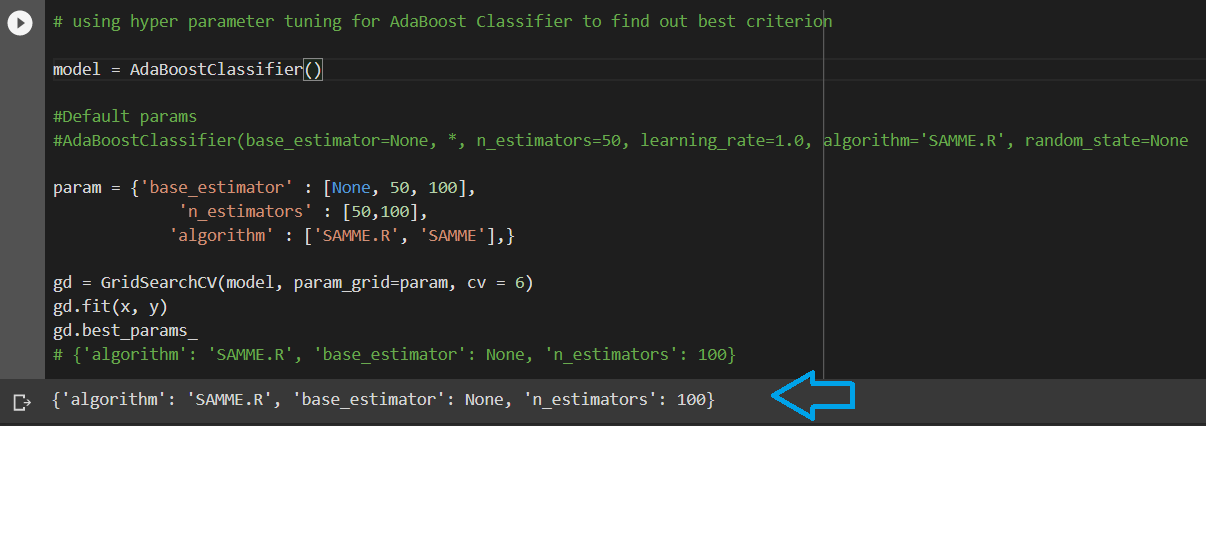

#### Above output taken from google collab as GridSearchCV takes more than one hour to find best parameters.

# Final Model Logistic Regression

In [136]:
model = AdaBoostClassifier(algorithm= 'SAMME.R', base_estimator = None, n_estimators= 100)

In [138]:
best_model.best_fit(x, y, model)  #finding best random state

At random_state:- 13
Training accuracy_score is:- 87.12785770196227
Testing accuracy_score is:- 87.09921191838498


At random_state:- 21
Training accuracy_score is:- 87.26821236740533
Testing accuracy_score is:- 87.25035085825327


At random_state:- 60
Training accuracy_score is:- 87.27361062376853
Testing accuracy_score is:- 87.28273777393933


At random_state:- 89
Training accuracy_score is:- 87.16294636832303
Testing accuracy_score is:- 87.18557702688115


At random_state:- 108
Training accuracy_score is:- 87.25471672649734
Testing accuracy_score is:- 87.29353341250135


At random_state:- 109
Training accuracy_score is:- 87.12785770196227
Testing accuracy_score is:- 87.07762064126094


At random_state:- 111
Training accuracy_score is:- 87.02259170287996
Testing accuracy_score is:- 87.0128468098888


At random_state:- 119
Training accuracy_score is:- 87.23042457286296
Testing accuracy_score is:- 87.2179639425672


At random_state:- 141
Training accuracy_score is:- 87.20343329104699
T

### At Random State 60 model gives best accuracy score

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 60)
model.fit(x_train, y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
print("At random state", 60 , "model giving best accuracy score","\n")
Train_accuracy = accuracy_score(pred_train, y_train)
Test_accuracy = accuracy_score(pred_test, y_test)
print('Training accuracy:- ', Train_accuracy*100)
print('Testing accuracy:- ', Test_accuracy*100)
print("\n")
print('--------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(pred_test, y_test) )
print("\n")
print('Classification Report')
print(classification_report(pred_test, y_test) )   # at random state 60 model shows best accuracy

At random state 60 model giving best accuracy score 

Training accuracy:-  87.27361062376853
Testing accuracy:-  87.28273777393933


--------------------------------------
Confusion Matrix
[[4064  583]
 [ 595 4021]]


Classification Report
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4647
           1       0.87      0.87      0.87      4616

    accuracy                           0.87      9263
   macro avg       0.87      0.87      0.87      9263
weighted avg       0.87      0.87      0.87      9263



In [140]:
cv = cross_val_score(model, x, y, cv = 7).mean()
print('cross_val_score', cv*100,'at cv =', 7  )

cross_val_score 86.27569528415961 at cv = 7


## Using Predict Proba function for finding accuracy (i.e Income greater than 50K)

In [141]:
final_pred_prob = model.predict_proba(x_test)[:, 1]

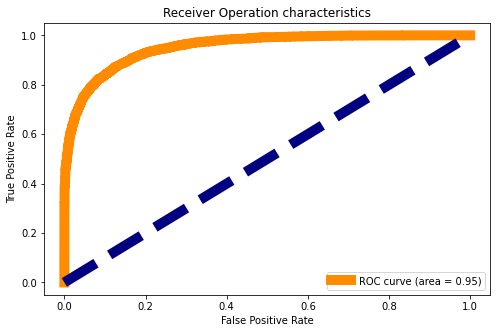

In [142]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresolds = roc_curve(y_test, final_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (8,5))
plt.plot(fpr, tpr, color = 'darkorange', lw = 10, label = "ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1], color = 'navy', lw = 10, linestyle = '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operation characteristics")
plt.legend(loc = "lower right")
plt.show()

### Deploy Model

In [143]:
import pickle

filename = "Census_Income.pkl"
pickle.dump(model, open(filename, 'wb'))

### Loading Model

In [144]:
load = pickle.load(open('Census_Income.pkl', 'rb'))
result = load.score(x_test, y_test)
print(result)

0.8728273777393933


### Conclusion

In [145]:
conclusion = pd.DataFrame()
conclusion['Predicted Income of Peoples'] = np.array(model.predict(x_test))
conclusion['Actual Income of Peoples'] = np.array(y_test)

In [151]:
conclusion.sample(10)

,Predicted Income of Peoples,Actual Income of Peoples
169,1,1
2861,1,1
5046,1,1
9050,0,0
346,1,1
2698,1,1
3620,1,1
302,0,0
6263,0,0
290,0,0
